# **Kết Nối Google Drive**

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# **Import Thư Viện và Load Data**

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [3]:
# Load data
data = pd.read_csv('bank-additional-full.csv', sep = ';')
display(data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# **Tiền Xử Lý Dữ Liệu**

## *- Kiểm Tra Dữ Liệu Bị Khuyết Thiếu*

In [4]:
# Kiểm tra thông tin dữ liệu
data.info()
# các columns đều đúng kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Kiểm tra các cột chứa dữ liệu thiếu
data.isna().sum()
# không có missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
cate_col = [i for i in data.columns ]
for i in cate_col:
  unique = data[i].unique().tolist()
  print(i ,"  ", unique)

age    [56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]
job    ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
marital    ['married', 'single', 'divorced', 'unknown']
education    ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
default    ['no', 'unknown', 'yes']
housing    ['no', 'yes', 'unknown']
loan    ['no', 'yes', 'unknown']
contact    ['telephone', 'cellular']
month    ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
day_of_week    ['mon', 'tue', 'wed', 'thu', 'fri']
duration    [261, 149, 226, 151, 307, 198, 139, 217

In [7]:
data = data.drop(["month","day_of_week","contact"],axis=1)

## *- Xử Lý các cột chứa giá trị 'unknown'*

In [8]:
# Các cột chứa giá trị 'unknown'
categoricals = []
for i in data.columns:
  if data[data[i]=='unknown'].shape[0] > 0:
    categoricals.append(i)
categoricals

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [9]:
# Các cột chứa giá trị numerical
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [10]:
data.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
# Encoder các cột categorical
d = data.copy()
le = LabelEncoder()
for col in categoricals:
    le.fit(d[col])
    d[col+'_encoded'] = le.transform(d[col])
    d.loc[d[col]=='unknown', col+'_encoded'] = np.nan

d = d.drop(columns = categoricals, axis=1)
d

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded
0,56,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.0,1.0,0.0,0.0,0.0,0.0
1,57,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7.0,1.0,3.0,NaN,0.0,0.0
2,37,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7.0,1.0,3.0,0.0,2.0,0.0
3,40,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,1.0,1.0,0.0,0.0,0.0
4,56,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7.0,1.0,3.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,5.0,1.0,5.0,0.0,2.0,0.0
41184,46,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.0,1.0,5.0,0.0,0.0,0.0
41185,56,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,5.0,1.0,6.0,0.0,2.0,0.0
41186,44,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,9.0,1.0,5.0,0.0,0.0,0.0


In [12]:
# Kiểm tra một lần nữa các cột chứa dữ liệu bị thiếu
d.isna().sum().sort_values(ascending = False)

default_encoded      8597
education_encoded    1731
loan_encoded          990
housing_encoded       990
job_encoded           330
marital_encoded        80
duration                0
y                       0
nr.employed             0
age                     0
cons.conf.idx           0
cons.price.idx          0
emp.var.rate            0
poutcome                0
previous                0
pdays                   0
campaign                0
euribor3m               0
dtype: int64

Nhận Xét: Vì các dòng dữ liệu chứa giá trị bị thiếu chiếm nhiều nhất là 20% so với số dòng từ bộ dữ liệu gốc, nên việc xóa các dòng dữ liệu bị thiếu sẽ có ảnh hưởng rất lớn đến việc phân lớp sau này cho kết quả không chính xác.

Nhóm sẽ xử lý outliers trước

## *- Mã Hóa Dữ Liệu các biến phân loại còn lại*

In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   duration           41188 non-null  int64  
 2   campaign           41188 non-null  int64  
 3   pdays              41188 non-null  int64  
 4   previous           41188 non-null  int64  
 5   poutcome           41188 non-null  object 
 6   emp.var.rate       41188 non-null  float64
 7   cons.price.idx     41188 non-null  float64
 8   cons.conf.idx      41188 non-null  float64
 9   euribor3m          41188 non-null  float64
 10  nr.employed        41188 non-null  float64
 11  y                  41188 non-null  object 
 12  job_encoded        40858 non-null  float64
 13  marital_encoded    41108 non-null  float64
 14  education_encoded  39457 non-null  float64
 15  default_encoded    32591 non-null  float64
 16  housing_encoded    401

In [14]:
# Mã hóa dữ liệu của các biến phân loại
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
for i in d.columns:
  if d[i].dtypes == 'object':
    d[i] = ord_enc.fit_transform(d[[i]]).astype('int')

In [15]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   duration           41188 non-null  int64  
 2   campaign           41188 non-null  int64  
 3   pdays              41188 non-null  int64  
 4   previous           41188 non-null  int64  
 5   poutcome           41188 non-null  int64  
 6   emp.var.rate       41188 non-null  float64
 7   cons.price.idx     41188 non-null  float64
 8   cons.conf.idx      41188 non-null  float64
 9   euribor3m          41188 non-null  float64
 10  nr.employed        41188 non-null  float64
 11  y                  41188 non-null  int64  
 12  job_encoded        40858 non-null  float64
 13  marital_encoded    41108 non-null  float64
 14  education_encoded  39457 non-null  float64
 15  default_encoded    32591 non-null  float64
 16  housing_encoded    401

In [16]:
d

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded
0,56,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,3.0,1.0,0.0,0.0,0.0,0.0
1,57,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0,3.0,NaN,0.0,0.0
2,37,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0,3.0,0.0,2.0,0.0
3,40,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0,1.0,0.0,0.0,0.0
4,56,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0,3.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,5.0,1.0,5.0,0.0,2.0,0.0
41184,46,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,1.0,1.0,5.0,0.0,0.0,0.0
41185,56,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,5.0,1.0,6.0,0.0,2.0,0.0
41186,44,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,9.0,1.0,5.0,0.0,0.0,0.0


## *Xử Lý Outliers*

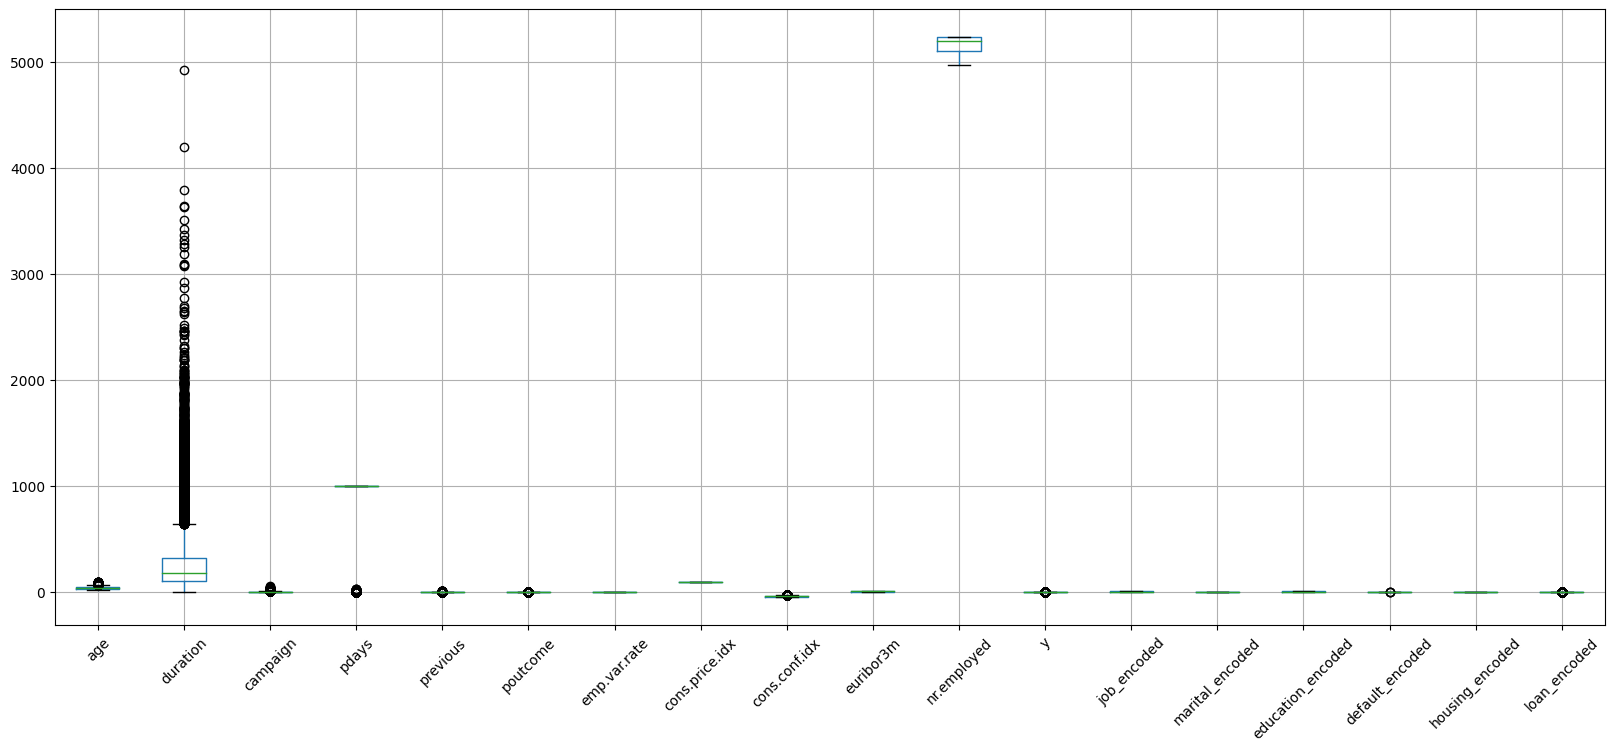

In [17]:
# Vẽ biểu đồ boxplot thể hiện các cột chứa các outliers
plt.figure(figsize=(20,8))
d.boxplot()
plt.xticks(rotation=45)
print()

Nhận xét: Từ biểu đồ trên, nhóm nhìn thấy cột duration là chứa nhiều giá trị outliers nhất và các cột age, campaign, pdays, previous, cons.conf.idx, default_encoded, loan_encoded có chứa dữ liệu khuyết thiếu nhưng không đáng kể.

Nhóm sẽ tiến hành kiểm tra từng biến để xem sẽ xử lý cột nào.

<Axes: ylabel='loan_encoded'>

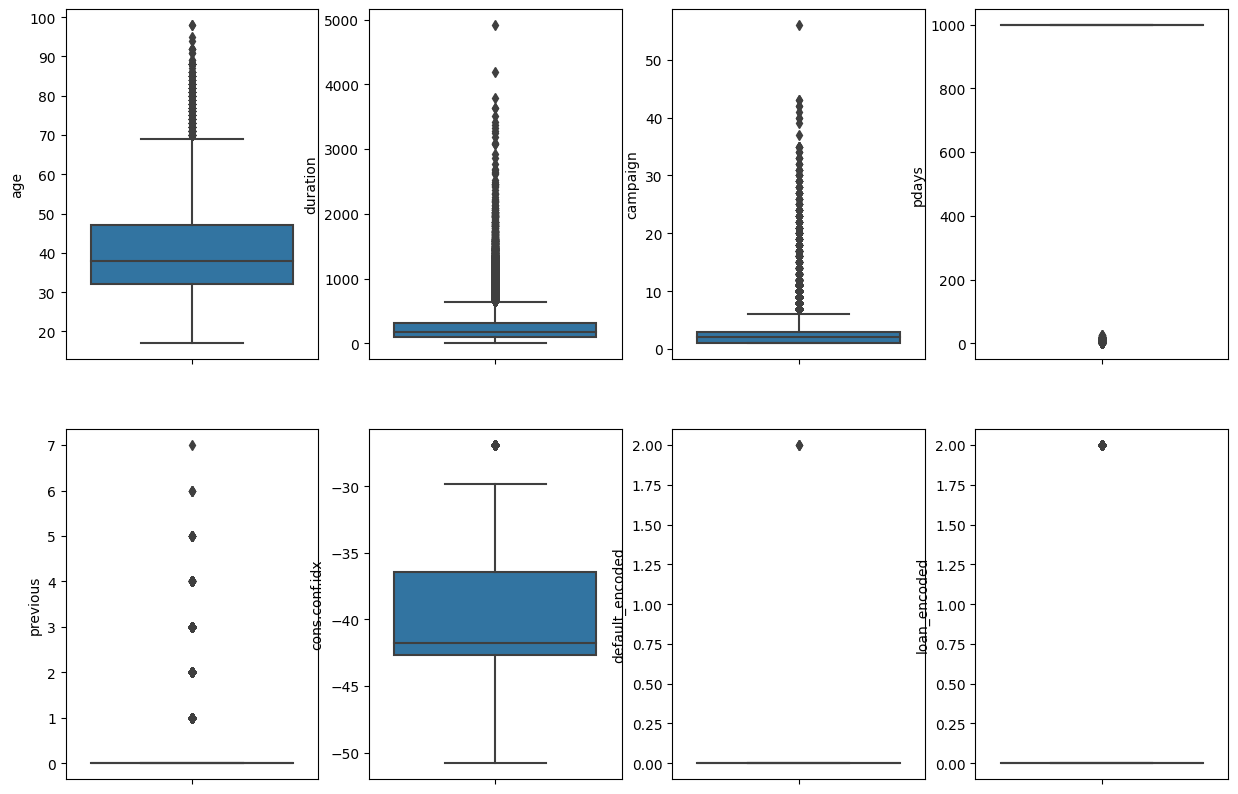

In [18]:
# Vẽ biểu đồ boxplot của từng biến 
fig, axs = plt.subplots(nrows=2, ncols=4,figsize=(15,10), sharex=True)
sns.boxplot(y=d["age"],ax=axs[0][0])
sns.boxplot(y=d["duration"],ax=axs[0][1])
sns.boxplot(y=d["campaign"],ax=axs[0][2])
sns.boxplot(y=d["pdays"],ax=axs[0][3])
sns.boxplot(y=d["previous"],ax=axs[1][0])
sns.boxplot(y=d["cons.conf.idx"],ax=axs[1][1])
sns.boxplot(y=d["default_encoded"],ax=axs[1][2])
sns.boxplot(y=d["loan_encoded"],ax=axs[1][3])

Nhận xét: Từ các biểu đồ trên các cột 'age', 'duration', 'previous', 'campaign' là chứa các outliers được nhìn thấy rõ nhất, nên nhóm sẽ tiến hành xử lý các outlier của các cột này.

In [19]:
# Xử Lý Outliers 
lower = 0.25
higher = 0.75
outlier_columns = ['age', 'duration', 'previous', 'campaign']
for column in outlier_columns:     
    Q1 = d[column].quantile(.25)
    Q3 = d[column].quantile(.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    d = d[d[column] >= lower] 
    d = d[d[column] <=upper] 

## *- Fill giá trị missing value bằng module KNNImputer*

In [20]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30573 entries, 0 to 41186
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                30573 non-null  int64  
 1   duration           30573 non-null  int64  
 2   campaign           30573 non-null  int64  
 3   pdays              30573 non-null  int64  
 4   previous           30573 non-null  int64  
 5   poutcome           30573 non-null  int64  
 6   emp.var.rate       30573 non-null  float64
 7   cons.price.idx     30573 non-null  float64
 8   cons.conf.idx      30573 non-null  float64
 9   euribor3m          30573 non-null  float64
 10  nr.employed        30573 non-null  float64
 11  y                  30573 non-null  int64  
 12  job_encoded        30322 non-null  float64
 13  marital_encoded    30526 non-null  float64
 14  education_encoded  29330 non-null  float64
 15  default_encoded    23705 non-null  float64
 16  housing_encoded    298

In [21]:
from sklearn.impute import KNNImputer

# Khởi tạo đối tượng KNNImputer với n_neighbors = 9
imputer = KNNImputer(n_neighbors=9)

# Điền giá trị bị khuyết và trả về một mảng Numpy mới
new_array  = imputer.fit_transform(d)

# Tạo một DataFrame mới từ mảng Numpy
df = pd.DataFrame(data=new_array, columns=d.columns)

Nhận xét: Như đã nói ở trên, vì số dòng chứa dữ liệu khuyết thiếu có nhiều nhất 20% bị khuyết thiếu nên nhóm không thể xóa nó được, nên nhóm sẽ dùng hàm KNNImputer để điền giá trị vào các dòng bị khuyết thiếu.

KNNImputer được dựa trên thuật toán KNN để điền giá trị, nhóm sẽ chọn 9 điểm gần nhất của các dòng bị khuyết thiếu.

In [22]:
df.isnull().sum()

age                  0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
job_encoded          0
marital_encoded      0
education_encoded    0
default_encoded      0
housing_encoded      0
loan_encoded         0
dtype: int64

## *- Xử Lý Data Imbalance*

In [23]:
y = df["y"]
X = df.drop(['y'], axis=1)

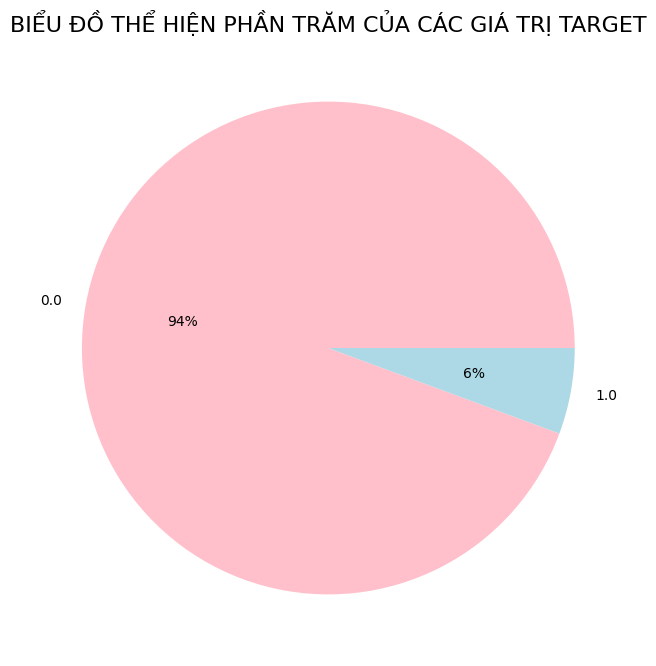

In [24]:
plt.figure(figsize = (16,8))
plt.title('Biểu đồ thể hiện phần trăm của các giá trị target'.upper(), fontsize = 16)
plt.pie(y.value_counts(),labels=y.unique(), autopct = '%.f%%', colors = {'lightblue', 'pink'})
plt.show()
#data đang bị imbalance nên cần balance lại data

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.8)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [26]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51926 entries, 0 to 51925
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                51926 non-null  float64
 1   duration           51926 non-null  float64
 2   campaign           51926 non-null  float64
 3   pdays              51926 non-null  float64
 4   previous           51926 non-null  float64
 5   poutcome           51926 non-null  float64
 6   emp.var.rate       51926 non-null  float64
 7   cons.price.idx     51926 non-null  float64
 8   cons.conf.idx      51926 non-null  float64
 9   euribor3m          51926 non-null  float64
 10  nr.employed        51926 non-null  float64
 11  job_encoded        51926 non-null  float64
 12  marital_encoded    51926 non-null  float64
 13  education_encoded  51926 non-null  float64
 14  default_encoded    51926 non-null  float64
 15  housing_encoded    51926 non-null  float64
 16  loan_encoded       519

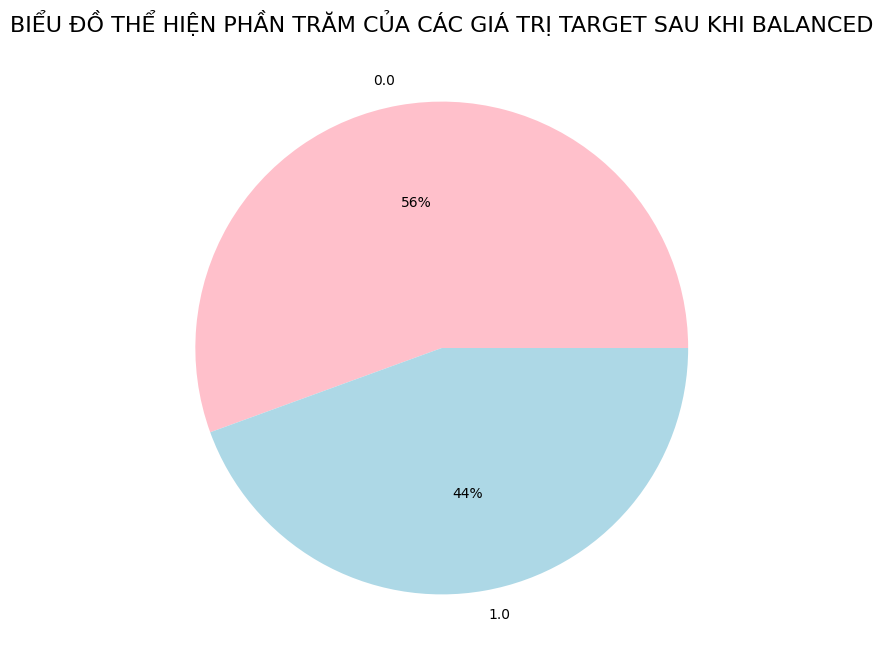

In [27]:
plt.figure(figsize = (16,8))
plt.title('Biểu đồ thể hiện phần trăm của các giá trị target sau khi balanced'.upper(), fontsize = 16)
plt.pie(y_resampled.value_counts(),labels=y_resampled.unique(), autopct = '%.f%%', colors = {'lightblue', 'pink'})
plt.show()
#target sau khi đã balanced

##Scale data

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_resampled

array([[ 1.6854019 , -0.03349827, -0.82765155, ..., -0.00875131,
        -1.18915941, -0.45296418],
       [ 1.78528841, -0.70826267, -0.82765155, ..., -0.00875131,
        -1.18915941, -0.45296418],
       [-0.21244173, -0.24436215, -0.82765155, ..., -0.00875131,
         0.99113912, -0.45296418],
       ...,
       [-0.65880271, -0.35563008, -0.03343139, ..., -0.00875131,
        -1.04317862, -0.45296418],
       [-0.31597144,  1.36690415, -0.82765155, ..., -0.00875131,
        -0.86632777, -0.45296418],
       [-0.46262417, -0.95074206, -0.82765155, ..., -0.00875131,
         0.99113912,  0.87569507]])

#Machine Learning

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size = 0.80, test_size = 0.20, random_state = 42)

In [30]:
def score_model(m, y_test):
  use_model = m
  use_model.fit(X_train, y_train)
  y_pred = use_model.predict(X_test)


  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
  print('Accuracy:', accuracy)
  print('Precision:', precision)
  print('Recall:', recall)
  print('F1 score:', f1)
  print('AUC:', auc)

##K-Nearest Neighbors

In [31]:
score_model(KNeighborsClassifier(n_neighbors = 2), y_test)

Accuracy: 0.9606200654727518
Precision: 0.9610790257254126
Recall: 0.9606200654727518
F1 score: 0.960666605060295
AUC: 0.9616067308857903


##SVM

In [32]:
score_model(svm.SVC(kernel='linear'), y_test)

Accuracy: 0.8517234739071827
Precision: 0.8536228160807646
Recall: 0.8517234739071827
F1 score: 0.8520179230517029
AUC: 0.8530282660937684


In [33]:
score_model(svm.SVC(kernel='rbf'), y_test) 

Accuracy: 0.919892162526478
Precision: 0.9215437622319109
Recall: 0.919892162526478
F1 score: 0.9200485120270464
AUC: 0.9217944105492357


In [34]:
score_model(svm.SVC(kernel='poly', degree=2), y_test)

Accuracy: 0.8525900250336992
Precision: 0.8540320834580207
Recall: 0.8525900250336992
F1 score: 0.8516596192671319
AUC: 0.8467909830385313


#DeepLearning

##Simple Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers



model = Sequential()
model.add(Dense(128, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
dl_train_model = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
1299/1299 [==============================] - 5s 3ms/step - loss: 0.3619 - accuracy: 0.8405 - val_loss: 0.3054 - val_accuracy: 0.8710
Epoch 2/100
1299/1299 [==============================] - 3s 2ms/step - loss: 0.3139 - accuracy: 0.8662 - val_loss: 0.2800 - val_accuracy: 0.8842
Epoch 3/100
1299/1299 [==============================] - 3s 3ms/step - loss: 0.2905 - accuracy: 0.8778 - val_loss: 0.2626 - val_accuracy: 0.8920
Epoch 4/100
1299/1299 [==============================] - 5s 4ms/step - loss: 0.2752 - accuracy: 0.8851 - val_loss: 0.2461 - val_accuracy: 0.9019
Epoch 5/100
1299/1299 [==============================] - 3s 3ms/step - loss: 0.2614 - accuracy: 0.8912 - val_loss: 0.2363 - val_accuracy: 0.9039
Epoch 6/100
1299/1299 [==============================] - 3s 2ms/step - loss: 0.2539 - accuracy: 0.8959 - val_loss: 0.2296 - val_accuracy: 0.9080
Epoch 7/100
1299/1299 [==============================] - 3s 3ms/step - loss: 0.2450 - accuracy: 0.9001 - val_loss: 0.2213 - val_ac

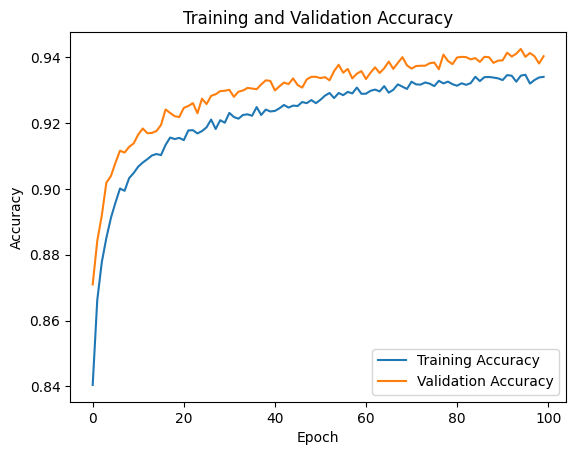

In [ ]:
plt.plot(dl_train_model.history['accuracy'], label='Training Accuracy')
plt.plot(dl_train_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

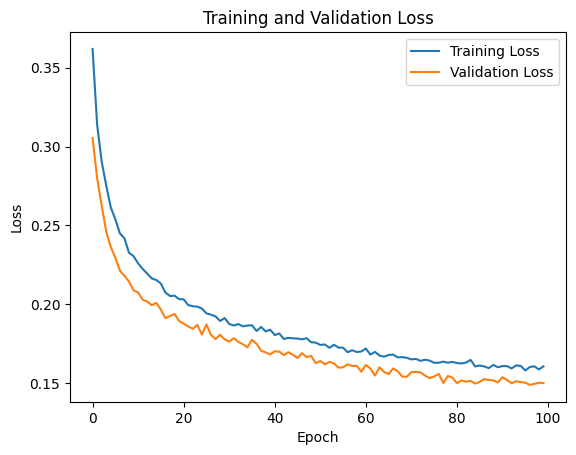

In [ ]:
plt.plot(dl_train_model.history['loss'], label='Training Loss')
plt.plot(dl_train_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

325/325 [==============================] - 1s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test = y_test.astype(int)
y_pred = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc)
print(prec)
print(rec)
print(f1)

0.9403042557288658
0.9019607843137255
0.9732848899337465
0.9362664473684209


##Tunning

In [ ]:
x_grid, x_not_use, y_grid, y_not_use = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

In [ ]:
x_grid.shape, y_grid.shape

((8308, 17), (8308,))

### Model

In [ ]:
from itertools import product
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import maxnorm
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def define_model(dropout_rate=0.0, weight_constraint=0, neurons= (256,), reg_strength=0.01):   
    model = Sequential()
    if len(neurons) == 1: 
        model.add(Dense(neurons[0], activation='relu', input_dim=x_grid.shape[1], 
                        kernel_constraint=maxnorm(weight_constraint), kernel_regularizer=regularizers.l2(reg_strength)))
        model.add(Dropout(dropout_rate))
        model.add(Dense(neurons[0], activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
        model.add(Dropout(dropout_rate))
        model.add(Dense(neurons[0], activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1, activation='sigmoid'))
    else:
        model.add(Dense(neurons[0], activation='relu', input_dim=x_grid.shape[1],
                        kernel_constraint=maxnorm(weight_constraint), kernel_regularizer=regularizers.l2(reg_strength)))
        model.add(Dropout(dropout_rate))
        for n in neurons[1:]:
            model.add(Dense(n, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
            model.add(Dropout(dropout_rate))
        model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=define_model, 
                        verbose=0)


dropout_rate = [0.2, 0.3, 0.4]
weight_constraint = [1, 2, 3]
neurons = [(256,), (256, 192, 256), (512, 256, 256), (512,)]
reg_strength = [0.01, 0.001, 0.0001]
batch_size = [64, 96, 128]
epochs = [5, 10]

#### model 1

In [ ]:
param_grid = dict(dropout_rate=dropout_rate, 
                  weight_constraint=weight_constraint,
                  neurons=neurons, reg_strength=reg_strength,
                  batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = 3, cv=3)

In [ ]:
grid_result = grid.fit(x_grid, y_grid)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.902865 using {'batch_size': 128, 'dropout_rate': 0.2, 'epochs': 10, 'neurons': (512, 256, 256), 'reg_strength': 0.0001, 'weight_constraint': 1}


In [ ]:
print(grid_result.best_estimator_)

#### model 2

In [ ]:
best_model =grid_result.best_estimator_

In [ ]:
model = Sequential()
    
model.add(Dense(512, activation='relu', input_dim=x_grid.shape[1], 
                        kernel_constraint=maxnorm(1), kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = best_model.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test))

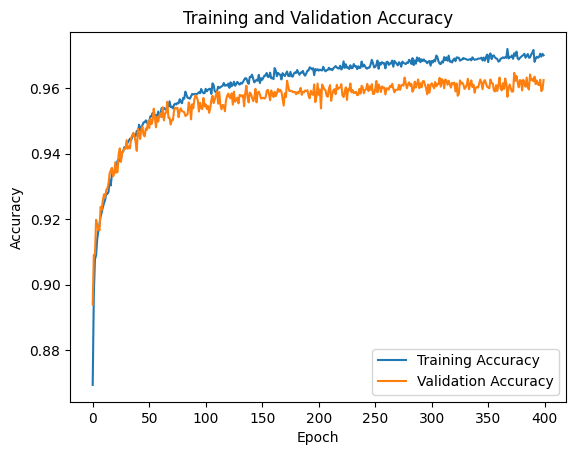

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

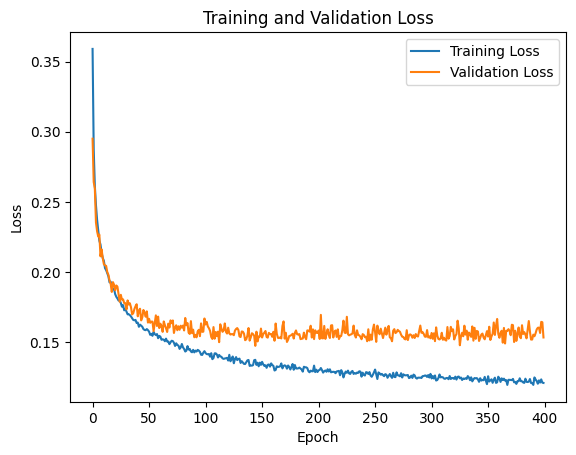

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = best_model.predict(X_test)

325/325 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test = y_test.astype(int)
y_pred = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc)
print(prec)
print(rec)
print(f1)

0.96158290005777
0.9443521594684385
0.9720025646505663
0.9579778830963666


In [ ]:
best = grid_result.best_estimator_.model
best.save('best_model.h5')

In [ ]:
best.save_weights('best_model_weights.h5')

### model 3

In [ ]:
third_best_index = grid_result.cv_results_['rank_test_score'].tolist().index(2)

# Get the parameters of the third best model
third_best_params = grid_result.cv_results_['params'][third_best_index]

In [ ]:
third_best_params

{'batch_size': 96,
 'dropout_rate': 0.2,
 'epochs': 10,
 'neurons': (512,),
 'reg_strength': 0.0001,
 'weight_constraint': 1}

In [ ]:
model_second = Sequential()
model_second.add(Dense(512, activation='relu', input_dim=x_grid.shape[1], 
                        kernel_constraint=maxnorm(1), kernel_regularizer=regularizers.l2(0.0001)))
model_second.add(Dropout(0.2))
model_second.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_second.add(Dropout(0.2))
model_second.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_second.add(Dropout(0.2))
model_second.add(Dense(1, activation='sigmoid'))
model_second.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model_second.fit(X_train, y_train, batch_size=96, epochs = 400, validation_data=(X_test, y_test))

Epoch 1/400
433/433 [==============================] - 12s 26ms/step - loss: 0.3668 - accuracy: 0.8737 - val_loss: 0.2938 - val_accuracy: 0.9023
Epoch 2/400
433/433 [==============================] - 9s 21ms/step - loss: 0.2828 - accuracy: 0.9022 - val_loss: 0.2580 - val_accuracy: 0.9127
Epoch 3/400
433/433 [==============================] - 11s 26ms/step - loss: 0.2573 - accuracy: 0.9075 - val_loss: 0.2416 - val_accuracy: 0.9161
Epoch 4/400
433/433 [==============================] - 12s 28ms/step - loss: 0.2429 - accuracy: 0.9110 - val_loss: 0.2365 - val_accuracy: 0.9154
Epoch 5/400
433/433 [==============================] - 14s 32ms/step - loss: 0.2359 - accuracy: 0.9138 - val_loss: 0.2260 - val_accuracy: 0.9220
Epoch 6/400
433/433 [==============================] - 10s 23ms/step - loss: 0.2266 - accuracy: 0.9177 - val_loss: 0.2297 - val_accuracy: 0.9233
Epoch 7/400
433/433 [==============================] - 9s 21ms/step - loss: 0.2182 - accuracy: 0.9201 - val_loss: 0.2073 - val_accu

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### model 4

In [ ]:
from tensorflow.keras.models import load_model
model_best = load_model('/content/gdrive/MyDrive/Project/đồ án ML/best_model.h5')

In [ ]:
history = model_best.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
1299/1299 [==============================] - 12s 8ms/step - loss: 0.2794 - accuracy: 0.8975 - val_loss: 0.2550 - val_accuracy: 0.9051
Epoch 2/400
1299/1299 [==============================] - 8s 7ms/step - loss: 0.2542 - accuracy: 0.9058 - val_loss: 0.2368 - val_accuracy: 0.9118
Epoch 3/400
1299/1299 [==============================] - 10s 8ms/step - loss: 0.2428 - accuracy: 0.9096 - val_loss: 0.2320 - val_accuracy: 0.9156
Epoch 4/400
1299/1299 [==============================] - 10s 8ms/step - loss: 0.2351 - accuracy: 0.9132 - val_loss: 0.2252 - val_accuracy: 0.9188
Epoch 5/400
1299/1299 [==============================] - 9s 7ms/step - loss: 0.2290 - accuracy: 0.9144 - val_loss: 0.2255 - val_accuracy: 0.9142
Epoch 6/400
1299/1299 [==============================] - 10s 8ms/step - loss: 0.2251 - accuracy: 0.9167 - val_loss: 0.2252 - val_accuracy: 0.9162
Epoch 7/400
1299/1299 [==============================] - 12s 9ms/step - loss: 0.2222 - accuracy: 0.9196 - val_loss: 0.2171 - v

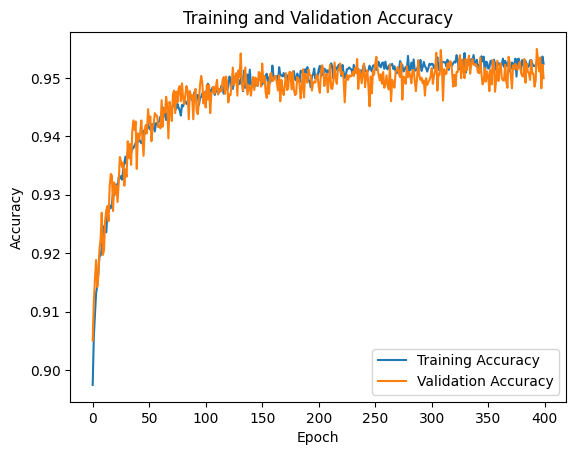

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

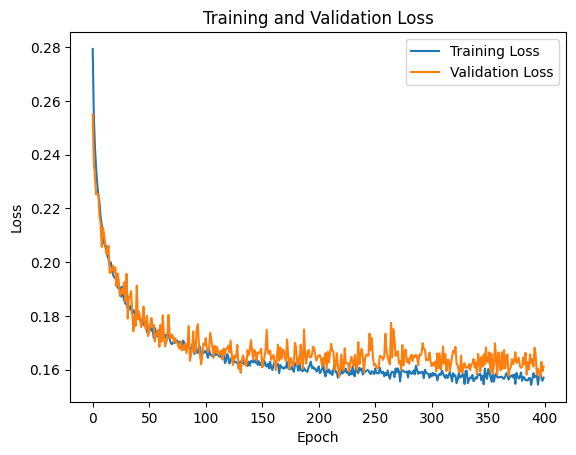

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model_best.predict(X_test)

325/325 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test = y_test.astype(int)
y_pred = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc)
print(prec)
print(rec)
print(f1)

0.9499326015790487
0.9281449454395717
0.9634537294293652
0.9454697986577182


#### model 5


In [ ]:
from itertools import product
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import maxnorm
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model_sb = Sequential()
model_sb.add(Dense(512, activation='relu', input_dim=X_train.shape[1], kernel_initializer='he_uniform',
                        kernel_constraint=maxnorm(1), kernel_regularizer=regularizers.l2(0.0001)))
model_sb.add(Dropout(0.2))
model_sb.add(Dense(256, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model_sb.add(Dropout(0.2))
model_sb.add(Dense(256, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model_sb.add(Dropout(0.2))
model_sb.add(Dense(1, activation='sigmoid'))
model_sb.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history_final = model_sb.fit(X_train, y_train, batch_size = 128, epochs=1000, validation_data=(X_test, y_test))



epoch 1/1000


349/349 [==============================] - 8s 18ms/step - loss: 0.4542 - accuracy: 0.8613 - val_loss: 0.3727 - val_accuracy: 0.9032


epoch 2/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.3703 - accuracy: 0.8954 - val_loss: 0.3257 - val_accuracy: 0.9145


epoch 3/1000


349/349 [==============================] - 4s 13ms/step - loss: 0.3349 - accuracy: 0.9043 - val_loss: 0.3082 - val_accuracy: 0.9142


epoch 4/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.3139 - accuracy: 0.9088 - val_loss: 0.2853 - val_accuracy: 0.9209


epoch 5/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.2946 - accuracy: 0.9129 - val_loss: 0.2733 - val_accuracy: 0.9208


epoch 6/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.2809 - accuracy: 0.9159 - val_loss: 0.2623 - val_accuracy: 0.9227


epoch 7/1000


349/349 [==============================] - 8s 22ms/step - loss: 0.2714 - accuracy: 0.9159 - val_loss: 0.2485 - val_accuracy: 0.9229


epoch 8/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.2608 - accuracy: 0.9208 - val_loss: 0.2447 - val_accuracy: 0.9239


epoch 9/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.2520 - accuracy: 0.9212 - val_loss: 0.2302 - val_accuracy: 0.9278


epoch 10/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.2459 - accuracy: 0.9221 - val_loss: 0.2343 - val_accuracy: 0.9259


epoch 11/1000


349/349 [==============================] - 4s 13ms/step - loss: 0.2407 - accuracy: 0.9226 - val_loss: 0.2218 - val_accuracy: 0.9313


epoch 12/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.2332 - accuracy: 0.9245 - val_loss: 0.2189 - val_accuracy: 0.9299


epoch 13/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.2286 - accuracy: 0.9267 - val_loss: 0.2137 - val_accuracy: 0.9299


epoch 14/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.2245 - accuracy: 0.9271 - val_loss: 0.2192 - val_accuracy: 0.9308


epoch 15/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.2229 - accuracy: 0.9285 - val_loss: 0.2104 - val_accuracy: 0.9346


epoch 16/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.2188 - accuracy: 0.9289 - val_loss: 0.2064 - val_accuracy: 0.9321


epoch 17/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.2166 - accuracy: 0.9298 - val_loss: 0.2065 - val_accuracy: 0.9345


epoch 18/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.2140 - accuracy: 0.9303 - val_loss: 0.1962 - val_accuracy: 0.9376


epoch 19/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.2103 - accuracy: 0.9319 - val_loss: 0.1987 - val_accuracy: 0.9355


epoch 20/1000


349/349 [==============================] - 4s 13ms/step - loss: 0.2070 - accuracy: 0.9345 - val_loss: 0.1971 - val_accuracy: 0.9378


epoch 21/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.2048 - accuracy: 0.9333 - val_loss: 0.1933 - val_accuracy: 0.9399


epoch 22/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.2037 - accuracy: 0.9337 - val_loss: 0.1961 - val_accuracy: 0.9368


epoch 23/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.2010 - accuracy: 0.9355 - val_loss: 0.1988 - val_accuracy: 0.9359


epoch 24/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1996 - accuracy: 0.9354 - val_loss: 0.2031 - val_accuracy: 0.9361


epoch 25/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1978 - accuracy: 0.9371 - val_loss: 0.1879 - val_accuracy: 0.9407


epoch 26/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1948 - accuracy: 0.9372 - val_loss: 0.1906 - val_accuracy: 0.9400


epoch 27/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1919 - accuracy: 0.9391 - val_loss: 0.1902 - val_accuracy: 0.9397


epoch 28/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1942 - accuracy: 0.9373 - val_loss: 0.1876 - val_accuracy: 0.9415


epoch 29/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1910 - accuracy: 0.9391 - val_loss: 0.1910 - val_accuracy: 0.9372


epoch 30/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1890 - accuracy: 0.9399 - val_loss: 0.1881 - val_accuracy: 0.9429


epoch 31/1000


349/349 [==============================] - 4s 13ms/step - loss: 0.1881 - accuracy: 0.9404 - val_loss: 0.1899 - val_accuracy: 0.9396


epoch 32/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1855 - accuracy: 0.9410 - val_loss: 0.1812 - val_accuracy: 0.9439


epoch 33/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1863 - accuracy: 0.9409 - val_loss: 0.1830 - val_accuracy: 0.9447


epoch 34/1000


349/349 [==============================] - 4s 13ms/step - loss: 0.1837 - accuracy: 0.9424 - val_loss: 0.1765 - val_accuracy: 0.9447


epoch 35/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1829 - accuracy: 0.9420 - val_loss: 0.1802 - val_accuracy: 0.9443


epoch 36/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1811 - accuracy: 0.9427 - val_loss: 0.1748 - val_accuracy: 0.9462


epoch 37/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1807 - accuracy: 0.9425 - val_loss: 0.1767 - val_accuracy: 0.9464


epoch 38/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1790 - accuracy: 0.9434 - val_loss: 0.1764 - val_accuracy: 0.9459


epoch 39/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1766 - accuracy: 0.9447 - val_loss: 0.1824 - val_accuracy: 0.9440


epoch 40/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1766 - accuracy: 0.9448 - val_loss: 0.1806 - val_accuracy: 0.9430


epoch 41/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1786 - accuracy: 0.9449 - val_loss: 0.1770 - val_accuracy: 0.9448


epoch 42/1000


349/349 [==============================] - 4s 13ms/step - loss: 0.1735 - accuracy: 0.9465 - val_loss: 0.1757 - val_accuracy: 0.9440


epoch 43/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1725 - accuracy: 0.9468 - val_loss: 0.1740 - val_accuracy: 0.9478


epoch 44/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1735 - accuracy: 0.9469 - val_loss: 0.1751 - val_accuracy: 0.9470


epoch 45/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1722 - accuracy: 0.9471 - val_loss: 0.1706 - val_accuracy: 0.9475


epoch 46/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1710 - accuracy: 0.9477 - val_loss: 0.1741 - val_accuracy: 0.9467


epoch 47/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1692 - accuracy: 0.9478 - val_loss: 0.1766 - val_accuracy: 0.9476


epoch 48/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1679 - accuracy: 0.9477 - val_loss: 0.1751 - val_accuracy: 0.9494


epoch 49/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1689 - accuracy: 0.9487 - val_loss: 0.1701 - val_accuracy: 0.9491


epoch 50/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1662 - accuracy: 0.9490 - val_loss: 0.1701 - val_accuracy: 0.9497


epoch 51/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1664 - accuracy: 0.9491 - val_loss: 0.1718 - val_accuracy: 0.9473


epoch 52/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1668 - accuracy: 0.9494 - val_loss: 0.1687 - val_accuracy: 0.9499


epoch 53/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1666 - accuracy: 0.9484 - val_loss: 0.1716 - val_accuracy: 0.9485


epoch 54/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1627 - accuracy: 0.9515 - val_loss: 0.1696 - val_accuracy: 0.9506


epoch 55/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1642 - accuracy: 0.9505 - val_loss: 0.1672 - val_accuracy: 0.9511


epoch 56/1000


349/349 [==============================] - 4s 13ms/step - loss: 0.1629 - accuracy: 0.9512 - val_loss: 0.1671 - val_accuracy: 0.9496


epoch 57/1000


349/349 [==============================] - 4s 13ms/step - loss: 0.1605 - accuracy: 0.9514 - val_loss: 0.1650 - val_accuracy: 0.9515


epoch 58/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1601 - accuracy: 0.9518 - val_loss: 0.1649 - val_accuracy: 0.9511


epoch 59/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1610 - accuracy: 0.9528 - val_loss: 0.1623 - val_accuracy: 0.9519


epoch 60/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1600 - accuracy: 0.9521 - val_loss: 0.1609 - val_accuracy: 0.9522


epoch 61/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1608 - accuracy: 0.9524 - val_loss: 0.1603 - val_accuracy: 0.9523


epoch 62/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1596 - accuracy: 0.9521 - val_loss: 0.1659 - val_accuracy: 0.9486


epoch 63/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1592 - accuracy: 0.9522 - val_loss: 0.1682 - val_accuracy: 0.9493


epoch 64/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1576 - accuracy: 0.9528 - val_loss: 0.1594 - val_accuracy: 0.9526


epoch 65/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1572 - accuracy: 0.9536 - val_loss: 0.1634 - val_accuracy: 0.9509


epoch 66/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1580 - accuracy: 0.9535 - val_loss: 0.1667 - val_accuracy: 0.9499


epoch 67/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1565 - accuracy: 0.9539 - val_loss: 0.1610 - val_accuracy: 0.9515


epoch 68/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1556 - accuracy: 0.9552 - val_loss: 0.1616 - val_accuracy: 0.9530


epoch 69/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1539 - accuracy: 0.9556 - val_loss: 0.1610 - val_accuracy: 0.9552


epoch 70/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1519 - accuracy: 0.9546 - val_loss: 0.1622 - val_accuracy: 0.9521


epoch 71/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1545 - accuracy: 0.9547 - val_loss: 0.1580 - val_accuracy: 0.9551


epoch 72/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1537 - accuracy: 0.9547 - val_loss: 0.1599 - val_accuracy: 0.9536


epoch 73/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1547 - accuracy: 0.9547 - val_loss: 0.1584 - val_accuracy: 0.9526


epoch 74/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1538 - accuracy: 0.9547 - val_loss: 0.1656 - val_accuracy: 0.9532


epoch 75/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1528 - accuracy: 0.9541 - val_loss: 0.1588 - val_accuracy: 0.9554


epoch 76/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1549 - accuracy: 0.9549 - val_loss: 0.1600 - val_accuracy: 0.9521


epoch 77/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1526 - accuracy: 0.9546 - val_loss: 0.1546 - val_accuracy: 0.9569


epoch 78/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1517 - accuracy: 0.9558 - val_loss: 0.1589 - val_accuracy: 0.9541


epoch 79/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1517 - accuracy: 0.9565 - val_loss: 0.1663 - val_accuracy: 0.9513


epoch 80/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1517 - accuracy: 0.9565 - val_loss: 0.1592 - val_accuracy: 0.9550


epoch 81/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1504 - accuracy: 0.9567 - val_loss: 0.1608 - val_accuracy: 0.9532


epoch 82/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1499 - accuracy: 0.9568 - val_loss: 0.1599 - val_accuracy: 0.9526


epoch 83/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1486 - accuracy: 0.9582 - val_loss: 0.1580 - val_accuracy: 0.9535


epoch 84/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1496 - accuracy: 0.9567 - val_loss: 0.1599 - val_accuracy: 0.9543


epoch 85/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1473 - accuracy: 0.9573 - val_loss: 0.1624 - val_accuracy: 0.9517


epoch 86/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1501 - accuracy: 0.9563 - val_loss: 0.1649 - val_accuracy: 0.9533


epoch 87/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1510 - accuracy: 0.9566 - val_loss: 0.1563 - val_accuracy: 0.9545


epoch 88/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1482 - accuracy: 0.9576 - val_loss: 0.1593 - val_accuracy: 0.9508


epoch 89/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1482 - accuracy: 0.9572 - val_loss: 0.1542 - val_accuracy: 0.9553


epoch 90/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1480 - accuracy: 0.9571 - val_loss: 0.1585 - val_accuracy: 0.9563


epoch 91/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1484 - accuracy: 0.9571 - val_loss: 0.1547 - val_accuracy: 0.9561


epoch 92/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1455 - accuracy: 0.9577 - val_loss: 0.1630 - val_accuracy: 0.9530


epoch 93/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1462 - accuracy: 0.9582 - val_loss: 0.1583 - val_accuracy: 0.9530


epoch 94/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1465 - accuracy: 0.9584 - val_loss: 0.1604 - val_accuracy: 0.9550


epoch 95/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1438 - accuracy: 0.9596 - val_loss: 0.1677 - val_accuracy: 0.9517


epoch 96/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1464 - accuracy: 0.9577 - val_loss: 0.1568 - val_accuracy: 0.9564


epoch 97/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1465 - accuracy: 0.9582 - val_loss: 0.1595 - val_accuracy: 0.9556


epoch 98/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1462 - accuracy: 0.9580 - val_loss: 0.1592 - val_accuracy: 0.9560


epoch 99/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1448 - accuracy: 0.9602 - val_loss: 0.1577 - val_accuracy: 0.9568


epoch 100/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1436 - accuracy: 0.9606 - val_loss: 0.1548 - val_accuracy: 0.9574


epoch 101/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1455 - accuracy: 0.9586 - val_loss: 0.1612 - val_accuracy: 0.9525


epoch 102/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1442 - accuracy: 0.9593 - val_loss: 0.1612 - val_accuracy: 0.9530


epoch 103/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1470 - accuracy: 0.9582 - val_loss: 0.1568 - val_accuracy: 0.9559


epoch 104/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1437 - accuracy: 0.9594 - val_loss: 0.1573 - val_accuracy: 0.9572


epoch 105/1000


349/349 [==============================] - 4s 13ms/step - loss: 0.1447 - accuracy: 0.9597 - val_loss: 0.1622 - val_accuracy: 0.9556


epoch 106/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1419 - accuracy: 0.9603 - val_loss: 0.1600 - val_accuracy: 0.9567


epoch 107/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1433 - accuracy: 0.9597 - val_loss: 0.1567 - val_accuracy: 0.9576


epoch 108/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1425 - accuracy: 0.9606 - val_loss: 0.1556 - val_accuracy: 0.9571


epoch 109/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1446 - accuracy: 0.9590 - val_loss: 0.1611 - val_accuracy: 0.9555


epoch 110/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1426 - accuracy: 0.9597 - val_loss: 0.1575 - val_accuracy: 0.9552


epoch 111/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1413 - accuracy: 0.9604 - val_loss: 0.1555 - val_accuracy: 0.9564


epoch 112/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1422 - accuracy: 0.9609 - val_loss: 0.1593 - val_accuracy: 0.9571


epoch 113/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1435 - accuracy: 0.9593 - val_loss: 0.1574 - val_accuracy: 0.9578


epoch 114/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1422 - accuracy: 0.9601 - val_loss: 0.1628 - val_accuracy: 0.9560


epoch 115/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1421 - accuracy: 0.9602 - val_loss: 0.1553 - val_accuracy: 0.9591


epoch 116/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1405 - accuracy: 0.9613 - val_loss: 0.1645 - val_accuracy: 0.9539


epoch 117/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1419 - accuracy: 0.9608 - val_loss: 0.1597 - val_accuracy: 0.9568


epoch 118/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1404 - accuracy: 0.9607 - val_loss: 0.1564 - val_accuracy: 0.9571


epoch 119/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1423 - accuracy: 0.9611 - val_loss: 0.1595 - val_accuracy: 0.9547


epoch 120/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1412 - accuracy: 0.9601 - val_loss: 0.1592 - val_accuracy: 0.9557


epoch 121/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1392 - accuracy: 0.9626 - val_loss: 0.1527 - val_accuracy: 0.9587


epoch 122/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1406 - accuracy: 0.9604 - val_loss: 0.1616 - val_accuracy: 0.9544


epoch 123/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1395 - accuracy: 0.9609 - val_loss: 0.1613 - val_accuracy: 0.9560


epoch 124/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1421 - accuracy: 0.9606 - val_loss: 0.1615 - val_accuracy: 0.9557


epoch 125/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1411 - accuracy: 0.9608 - val_loss: 0.1617 - val_accuracy: 0.9553


epoch 126/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1393 - accuracy: 0.9617 - val_loss: 0.1539 - val_accuracy: 0.9568


epoch 127/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1395 - accuracy: 0.9625 - val_loss: 0.1557 - val_accuracy: 0.9589


epoch 128/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1393 - accuracy: 0.9613 - val_loss: 0.1578 - val_accuracy: 0.9576


epoch 129/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1384 - accuracy: 0.9628 - val_loss: 0.1520 - val_accuracy: 0.9591


epoch 130/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1384 - accuracy: 0.9620 - val_loss: 0.1673 - val_accuracy: 0.9538


epoch 131/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1379 - accuracy: 0.9631 - val_loss: 0.1540 - val_accuracy: 0.9592


epoch 132/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1389 - accuracy: 0.9617 - val_loss: 0.1641 - val_accuracy: 0.9556


epoch 133/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1359 - accuracy: 0.9628 - val_loss: 0.1587 - val_accuracy: 0.9551


epoch 134/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1386 - accuracy: 0.9623 - val_loss: 0.1545 - val_accuracy: 0.9578


epoch 135/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1372 - accuracy: 0.9619 - val_loss: 0.1589 - val_accuracy: 0.9567


epoch 136/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1394 - accuracy: 0.9620 - val_loss: 0.1521 - val_accuracy: 0.9587


epoch 137/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1376 - accuracy: 0.9621 - val_loss: 0.1570 - val_accuracy: 0.9573


epoch 138/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1368 - accuracy: 0.9632 - val_loss: 0.1545 - val_accuracy: 0.9579


epoch 139/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1351 - accuracy: 0.9637 - val_loss: 0.1584 - val_accuracy: 0.9576


epoch 140/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1385 - accuracy: 0.9635 - val_loss: 0.1557 - val_accuracy: 0.9574


epoch 141/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1359 - accuracy: 0.9634 - val_loss: 0.1574 - val_accuracy: 0.9580


epoch 142/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1373 - accuracy: 0.9634 - val_loss: 0.1521 - val_accuracy: 0.9605


epoch 143/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1357 - accuracy: 0.9639 - val_loss: 0.1557 - val_accuracy: 0.9575


epoch 144/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1376 - accuracy: 0.9625 - val_loss: 0.1529 - val_accuracy: 0.9577


epoch 145/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1366 - accuracy: 0.9635 - val_loss: 0.1618 - val_accuracy: 0.9546


epoch 146/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1371 - accuracy: 0.9629 - val_loss: 0.1527 - val_accuracy: 0.9589


epoch 147/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1350 - accuracy: 0.9635 - val_loss: 0.1580 - val_accuracy: 0.9581


epoch 148/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1369 - accuracy: 0.9634 - val_loss: 0.1573 - val_accuracy: 0.9589


epoch 149/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1363 - accuracy: 0.9640 - val_loss: 0.1560 - val_accuracy: 0.9571


epoch 150/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1347 - accuracy: 0.9645 - val_loss: 0.1599 - val_accuracy: 0.9575


epoch 151/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1339 - accuracy: 0.9648 - val_loss: 0.1581 - val_accuracy: 0.9592


epoch 152/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1368 - accuracy: 0.9624 - val_loss: 0.1569 - val_accuracy: 0.9579


epoch 153/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1368 - accuracy: 0.9633 - val_loss: 0.1529 - val_accuracy: 0.9608


epoch 154/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1348 - accuracy: 0.9652 - val_loss: 0.1525 - val_accuracy: 0.9597


epoch 155/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1343 - accuracy: 0.9642 - val_loss: 0.1533 - val_accuracy: 0.9597


epoch 156/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1356 - accuracy: 0.9639 - val_loss: 0.1509 - val_accuracy: 0.9616


epoch 157/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1336 - accuracy: 0.9645 - val_loss: 0.1652 - val_accuracy: 0.9564


epoch 158/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1336 - accuracy: 0.9637 - val_loss: 0.1568 - val_accuracy: 0.9589


epoch 159/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1360 - accuracy: 0.9635 - val_loss: 0.1635 - val_accuracy: 0.9564


epoch 160/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1336 - accuracy: 0.9645 - val_loss: 0.1635 - val_accuracy: 0.9571


epoch 161/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1325 - accuracy: 0.9663 - val_loss: 0.1524 - val_accuracy: 0.9580


epoch 162/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1348 - accuracy: 0.9643 - val_loss: 0.1570 - val_accuracy: 0.9599


epoch 163/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1348 - accuracy: 0.9641 - val_loss: 0.1537 - val_accuracy: 0.9597


epoch 164/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1339 - accuracy: 0.9652 - val_loss: 0.1586 - val_accuracy: 0.9579


epoch 165/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1318 - accuracy: 0.9656 - val_loss: 0.1596 - val_accuracy: 0.9576


epoch 166/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1326 - accuracy: 0.9656 - val_loss: 0.1504 - val_accuracy: 0.9626


epoch 167/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1328 - accuracy: 0.9650 - val_loss: 0.1535 - val_accuracy: 0.9608


epoch 168/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1327 - accuracy: 0.9652 - val_loss: 0.1511 - val_accuracy: 0.9602


epoch 169/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1321 - accuracy: 0.9652 - val_loss: 0.1601 - val_accuracy: 0.9571


epoch 170/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1323 - accuracy: 0.9649 - val_loss: 0.1573 - val_accuracy: 0.9585


epoch 171/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1332 - accuracy: 0.9643 - val_loss: 0.1562 - val_accuracy: 0.9593


epoch 172/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1348 - accuracy: 0.9649 - val_loss: 0.1485 - val_accuracy: 0.9600


epoch 173/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1300 - accuracy: 0.9662 - val_loss: 0.1598 - val_accuracy: 0.9572


epoch 174/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1324 - accuracy: 0.9652 - val_loss: 0.1599 - val_accuracy: 0.9590


epoch 175/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1324 - accuracy: 0.9650 - val_loss: 0.1566 - val_accuracy: 0.9580


epoch 176/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1353 - accuracy: 0.9638 - val_loss: 0.1553 - val_accuracy: 0.9600


epoch 177/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1359 - accuracy: 0.9643 - val_loss: 0.1489 - val_accuracy: 0.9611


epoch 178/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1316 - accuracy: 0.9652 - val_loss: 0.1521 - val_accuracy: 0.9619


epoch 179/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1301 - accuracy: 0.9659 - val_loss: 0.1607 - val_accuracy: 0.9587


epoch 180/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1332 - accuracy: 0.9644 - val_loss: 0.1519 - val_accuracy: 0.9600


epoch 181/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1322 - accuracy: 0.9661 - val_loss: 0.1552 - val_accuracy: 0.9589


epoch 182/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1324 - accuracy: 0.9652 - val_loss: 0.1581 - val_accuracy: 0.9582


epoch 183/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1333 - accuracy: 0.9645 - val_loss: 0.1521 - val_accuracy: 0.9609


epoch 184/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1319 - accuracy: 0.9654 - val_loss: 0.1524 - val_accuracy: 0.9590


epoch 185/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1309 - accuracy: 0.9660 - val_loss: 0.1583 - val_accuracy: 0.9611


epoch 186/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1295 - accuracy: 0.9667 - val_loss: 0.1512 - val_accuracy: 0.9618


epoch 187/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1321 - accuracy: 0.9653 - val_loss: 0.1523 - val_accuracy: 0.9601


epoch 188/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1301 - accuracy: 0.9664 - val_loss: 0.1569 - val_accuracy: 0.9599


epoch 189/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1313 - accuracy: 0.9656 - val_loss: 0.1618 - val_accuracy: 0.9590


epoch 190/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1328 - accuracy: 0.9651 - val_loss: 0.1571 - val_accuracy: 0.9595


epoch 191/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1324 - accuracy: 0.9656 - val_loss: 0.1540 - val_accuracy: 0.9604


epoch 192/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1316 - accuracy: 0.9658 - val_loss: 0.1621 - val_accuracy: 0.9568


epoch 193/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1310 - accuracy: 0.9653 - val_loss: 0.1556 - val_accuracy: 0.9591


epoch 194/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1317 - accuracy: 0.9652 - val_loss: 0.1524 - val_accuracy: 0.9595


epoch 195/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1301 - accuracy: 0.9666 - val_loss: 0.1697 - val_accuracy: 0.9539


epoch 196/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1302 - accuracy: 0.9663 - val_loss: 0.1574 - val_accuracy: 0.9600


epoch 197/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1304 - accuracy: 0.9667 - val_loss: 0.1586 - val_accuracy: 0.9584


epoch 198/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1302 - accuracy: 0.9660 - val_loss: 0.1530 - val_accuracy: 0.9604


epoch 199/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1317 - accuracy: 0.9652 - val_loss: 0.1551 - val_accuracy: 0.9609


epoch 200/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1314 - accuracy: 0.9660 - val_loss: 0.1503 - val_accuracy: 0.9618


epoch 201/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1308 - accuracy: 0.9662 - val_loss: 0.1578 - val_accuracy: 0.9587


epoch 202/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1300 - accuracy: 0.9666 - val_loss: 0.1557 - val_accuracy: 0.9613


epoch 203/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1303 - accuracy: 0.9663 - val_loss: 0.1582 - val_accuracy: 0.9585


epoch 204/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1289 - accuracy: 0.9660 - val_loss: 0.1564 - val_accuracy: 0.9579


epoch 205/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1318 - accuracy: 0.9659 - val_loss: 0.1522 - val_accuracy: 0.9606


epoch 206/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1308 - accuracy: 0.9658 - val_loss: 0.1574 - val_accuracy: 0.9593


epoch 207/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1303 - accuracy: 0.9661 - val_loss: 0.1549 - val_accuracy: 0.9585


epoch 208/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1302 - accuracy: 0.9666 - val_loss: 0.1666 - val_accuracy: 0.9552


epoch 209/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1280 - accuracy: 0.9663 - val_loss: 0.1593 - val_accuracy: 0.9595


epoch 210/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1310 - accuracy: 0.9665 - val_loss: 0.1557 - val_accuracy: 0.9598


epoch 211/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1304 - accuracy: 0.9664 - val_loss: 0.1572 - val_accuracy: 0.9604


epoch 212/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1308 - accuracy: 0.9654 - val_loss: 0.1574 - val_accuracy: 0.9609


epoch 213/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1293 - accuracy: 0.9667 - val_loss: 0.1577 - val_accuracy: 0.9596


epoch 214/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1300 - accuracy: 0.9658 - val_loss: 0.1518 - val_accuracy: 0.9608


epoch 215/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1293 - accuracy: 0.9666 - val_loss: 0.1521 - val_accuracy: 0.9604


epoch 216/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1299 - accuracy: 0.9667 - val_loss: 0.1473 - val_accuracy: 0.9613


epoch 217/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1294 - accuracy: 0.9665 - val_loss: 0.1551 - val_accuracy: 0.9607


epoch 218/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1309 - accuracy: 0.9662 - val_loss: 0.1551 - val_accuracy: 0.9619


epoch 219/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1296 - accuracy: 0.9673 - val_loss: 0.1608 - val_accuracy: 0.9591


epoch 220/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1281 - accuracy: 0.9671 - val_loss: 0.1569 - val_accuracy: 0.9610


epoch 221/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1312 - accuracy: 0.9660 - val_loss: 0.1529 - val_accuracy: 0.9614


epoch 222/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1298 - accuracy: 0.9665 - val_loss: 0.1510 - val_accuracy: 0.9621


epoch 223/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1277 - accuracy: 0.9674 - val_loss: 0.1559 - val_accuracy: 0.9600


epoch 224/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1286 - accuracy: 0.9670 - val_loss: 0.1550 - val_accuracy: 0.9589


epoch 225/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1314 - accuracy: 0.9660 - val_loss: 0.1575 - val_accuracy: 0.9594


epoch 226/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1304 - accuracy: 0.9660 - val_loss: 0.1555 - val_accuracy: 0.9594


epoch 227/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1290 - accuracy: 0.9666 - val_loss: 0.1542 - val_accuracy: 0.9612


epoch 228/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1319 - accuracy: 0.9652 - val_loss: 0.1597 - val_accuracy: 0.9580


epoch 229/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1306 - accuracy: 0.9659 - val_loss: 0.1554 - val_accuracy: 0.9612


epoch 230/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1267 - accuracy: 0.9675 - val_loss: 0.1569 - val_accuracy: 0.9586


epoch 231/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1276 - accuracy: 0.9682 - val_loss: 0.1554 - val_accuracy: 0.9613


epoch 232/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1287 - accuracy: 0.9665 - val_loss: 0.1552 - val_accuracy: 0.9595


epoch 233/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1294 - accuracy: 0.9669 - val_loss: 0.1569 - val_accuracy: 0.9595


epoch 234/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1286 - accuracy: 0.9673 - val_loss: 0.1529 - val_accuracy: 0.9595


epoch 235/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1304 - accuracy: 0.9664 - val_loss: 0.1532 - val_accuracy: 0.9592


epoch 236/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1273 - accuracy: 0.9677 - val_loss: 0.1490 - val_accuracy: 0.9631


epoch 237/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1279 - accuracy: 0.9676 - val_loss: 0.1541 - val_accuracy: 0.9604


epoch 238/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1286 - accuracy: 0.9673 - val_loss: 0.1543 - val_accuracy: 0.9609


epoch 239/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1316 - accuracy: 0.9662 - val_loss: 0.1528 - val_accuracy: 0.9609


epoch 240/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1284 - accuracy: 0.9669 - val_loss: 0.1512 - val_accuracy: 0.9626


epoch 241/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1259 - accuracy: 0.9678 - val_loss: 0.1502 - val_accuracy: 0.9622


epoch 242/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1287 - accuracy: 0.9666 - val_loss: 0.1524 - val_accuracy: 0.9606


epoch 243/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1284 - accuracy: 0.9677 - val_loss: 0.1517 - val_accuracy: 0.9595


epoch 244/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1275 - accuracy: 0.9671 - val_loss: 0.1553 - val_accuracy: 0.9595


epoch 245/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1286 - accuracy: 0.9670 - val_loss: 0.1578 - val_accuracy: 0.9592


epoch 246/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1271 - accuracy: 0.9684 - val_loss: 0.1527 - val_accuracy: 0.9602


epoch 247/1000


349/349 [==============================] - 5s 13ms/step - loss: 0.1277 - accuracy: 0.9674 - val_loss: 0.1678 - val_accuracy: 0.9569


epoch 248/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1276 - accuracy: 0.9685 - val_loss: 0.1512 - val_accuracy: 0.9609


epoch 249/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1259 - accuracy: 0.9682 - val_loss: 0.1539 - val_accuracy: 0.9623


epoch 250/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1290 - accuracy: 0.9669 - val_loss: 0.1497 - val_accuracy: 0.9639


epoch 251/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1269 - accuracy: 0.9677 - val_loss: 0.1534 - val_accuracy: 0.9631


epoch 252/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1256 - accuracy: 0.9689 - val_loss: 0.1523 - val_accuracy: 0.9606


epoch 253/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1263 - accuracy: 0.9683 - val_loss: 0.1545 - val_accuracy: 0.9610


epoch 254/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1290 - accuracy: 0.9666 - val_loss: 0.1562 - val_accuracy: 0.9592


epoch 255/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1249 - accuracy: 0.9678 - val_loss: 0.1568 - val_accuracy: 0.9595


epoch 256/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1266 - accuracy: 0.9680 - val_loss: 0.1522 - val_accuracy: 0.9618


epoch 257/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1270 - accuracy: 0.9679 - val_loss: 0.1546 - val_accuracy: 0.9598


epoch 258/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1266 - accuracy: 0.9669 - val_loss: 0.1588 - val_accuracy: 0.9601


epoch 259/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1276 - accuracy: 0.9678 - val_loss: 0.1549 - val_accuracy: 0.9606


epoch 260/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1255 - accuracy: 0.9677 - val_loss: 0.1574 - val_accuracy: 0.9594


epoch 261/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1269 - accuracy: 0.9681 - val_loss: 0.1557 - val_accuracy: 0.9599


epoch 262/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1273 - accuracy: 0.9675 - val_loss: 0.1563 - val_accuracy: 0.9614


epoch 263/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1272 - accuracy: 0.9671 - val_loss: 0.1514 - val_accuracy: 0.9608


epoch 264/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1283 - accuracy: 0.9664 - val_loss: 0.1533 - val_accuracy: 0.9608


epoch 265/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1295 - accuracy: 0.9663 - val_loss: 0.1516 - val_accuracy: 0.9604


epoch 266/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1266 - accuracy: 0.9684 - val_loss: 0.1497 - val_accuracy: 0.9625


epoch 267/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1272 - accuracy: 0.9678 - val_loss: 0.1491 - val_accuracy: 0.9617


epoch 268/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1257 - accuracy: 0.9680 - val_loss: 0.1564 - val_accuracy: 0.9608


epoch 269/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1274 - accuracy: 0.9677 - val_loss: 0.1502 - val_accuracy: 0.9618


epoch 270/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1263 - accuracy: 0.9678 - val_loss: 0.1527 - val_accuracy: 0.9609


epoch 271/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1248 - accuracy: 0.9679 - val_loss: 0.1565 - val_accuracy: 0.9612


epoch 272/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1278 - accuracy: 0.9677 - val_loss: 0.1556 - val_accuracy: 0.9624


epoch 273/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1245 - accuracy: 0.9692 - val_loss: 0.1572 - val_accuracy: 0.9611


epoch 274/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1271 - accuracy: 0.9683 - val_loss: 0.1578 - val_accuracy: 0.9595


epoch 275/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1264 - accuracy: 0.9682 - val_loss: 0.1562 - val_accuracy: 0.9600


epoch 276/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1264 - accuracy: 0.9675 - val_loss: 0.1556 - val_accuracy: 0.9611


epoch 277/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1278 - accuracy: 0.9672 - val_loss: 0.1530 - val_accuracy: 0.9597


epoch 278/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1253 - accuracy: 0.9682 - val_loss: 0.1532 - val_accuracy: 0.9615


epoch 279/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1264 - accuracy: 0.9684 - val_loss: 0.1506 - val_accuracy: 0.9611


epoch 280/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1267 - accuracy: 0.9685 - val_loss: 0.1564 - val_accuracy: 0.9604


epoch 281/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1269 - accuracy: 0.9683 - val_loss: 0.1554 - val_accuracy: 0.9615


epoch 282/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1242 - accuracy: 0.9688 - val_loss: 0.1527 - val_accuracy: 0.9578


epoch 283/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1268 - accuracy: 0.9678 - val_loss: 0.1520 - val_accuracy: 0.9626


epoch 284/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1262 - accuracy: 0.9685 - val_loss: 0.1527 - val_accuracy: 0.9615


epoch 285/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1262 - accuracy: 0.9683 - val_loss: 0.1531 - val_accuracy: 0.9600


epoch 286/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1241 - accuracy: 0.9691 - val_loss: 0.1590 - val_accuracy: 0.9613


epoch 287/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1272 - accuracy: 0.9678 - val_loss: 0.1480 - val_accuracy: 0.9625


epoch 288/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1273 - accuracy: 0.9681 - val_loss: 0.1505 - val_accuracy: 0.9621


epoch 289/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1283 - accuracy: 0.9678 - val_loss: 0.1486 - val_accuracy: 0.9629


epoch 290/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1248 - accuracy: 0.9691 - val_loss: 0.1616 - val_accuracy: 0.9594


epoch 291/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1282 - accuracy: 0.9667 - val_loss: 0.1504 - val_accuracy: 0.9611


epoch 292/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1262 - accuracy: 0.9673 - val_loss: 0.1540 - val_accuracy: 0.9597


epoch 293/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1272 - accuracy: 0.9670 - val_loss: 0.1635 - val_accuracy: 0.9587


epoch 294/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1247 - accuracy: 0.9677 - val_loss: 0.1554 - val_accuracy: 0.9603


epoch 295/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1257 - accuracy: 0.9686 - val_loss: 0.1555 - val_accuracy: 0.9624


epoch 296/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1246 - accuracy: 0.9690 - val_loss: 0.1609 - val_accuracy: 0.9599


epoch 297/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1263 - accuracy: 0.9672 - val_loss: 0.1527 - val_accuracy: 0.9630


epoch 298/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1248 - accuracy: 0.9687 - val_loss: 0.1520 - val_accuracy: 0.9647


epoch 299/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1251 - accuracy: 0.9687 - val_loss: 0.1542 - val_accuracy: 0.9615


epoch 300/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1248 - accuracy: 0.9688 - val_loss: 0.1567 - val_accuracy: 0.9595


epoch 301/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1264 - accuracy: 0.9684 - val_loss: 0.1560 - val_accuracy: 0.9602


epoch 302/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1249 - accuracy: 0.9689 - val_loss: 0.1519 - val_accuracy: 0.9621


epoch 303/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1273 - accuracy: 0.9680 - val_loss: 0.1613 - val_accuracy: 0.9587


epoch 304/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1254 - accuracy: 0.9693 - val_loss: 0.1605 - val_accuracy: 0.9599


epoch 305/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1272 - accuracy: 0.9682 - val_loss: 0.1571 - val_accuracy: 0.9603


epoch 306/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1257 - accuracy: 0.9680 - val_loss: 0.1529 - val_accuracy: 0.9619


epoch 307/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1262 - accuracy: 0.9689 - val_loss: 0.1519 - val_accuracy: 0.9614


epoch 308/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1249 - accuracy: 0.9683 - val_loss: 0.1592 - val_accuracy: 0.9574


epoch 309/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1229 - accuracy: 0.9693 - val_loss: 0.1547 - val_accuracy: 0.9619


epoch 310/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1282 - accuracy: 0.9674 - val_loss: 0.1546 - val_accuracy: 0.9616


epoch 311/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1235 - accuracy: 0.9697 - val_loss: 0.1643 - val_accuracy: 0.9567


epoch 312/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1241 - accuracy: 0.9695 - val_loss: 0.1523 - val_accuracy: 0.9601


epoch 313/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1245 - accuracy: 0.9689 - val_loss: 0.1616 - val_accuracy: 0.9602


epoch 314/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1231 - accuracy: 0.9701 - val_loss: 0.1540 - val_accuracy: 0.9621


epoch 315/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1229 - accuracy: 0.9697 - val_loss: 0.1591 - val_accuracy: 0.9591


epoch 316/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1252 - accuracy: 0.9687 - val_loss: 0.1569 - val_accuracy: 0.9613


epoch 317/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1233 - accuracy: 0.9691 - val_loss: 0.1645 - val_accuracy: 0.9579


epoch 318/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1234 - accuracy: 0.9695 - val_loss: 0.1504 - val_accuracy: 0.9630


epoch 319/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1261 - accuracy: 0.9686 - val_loss: 0.1567 - val_accuracy: 0.9607


epoch 320/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1258 - accuracy: 0.9684 - val_loss: 0.1581 - val_accuracy: 0.9597


epoch 321/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1247 - accuracy: 0.9694 - val_loss: 0.1604 - val_accuracy: 0.9617


epoch 322/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1267 - accuracy: 0.9680 - val_loss: 0.1520 - val_accuracy: 0.9626


epoch 323/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1241 - accuracy: 0.9677 - val_loss: 0.1575 - val_accuracy: 0.9605


epoch 324/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1237 - accuracy: 0.9698 - val_loss: 0.1518 - val_accuracy: 0.9634


epoch 325/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1249 - accuracy: 0.9687 - val_loss: 0.1536 - val_accuracy: 0.9623


epoch 326/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1250 - accuracy: 0.9693 - val_loss: 0.1573 - val_accuracy: 0.9610


epoch 327/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1229 - accuracy: 0.9686 - val_loss: 0.1540 - val_accuracy: 0.9598


epoch 328/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1224 - accuracy: 0.9698 - val_loss: 0.1564 - val_accuracy: 0.9605


epoch 329/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1232 - accuracy: 0.9696 - val_loss: 0.1531 - val_accuracy: 0.9608


epoch 330/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1236 - accuracy: 0.9694 - val_loss: 0.1587 - val_accuracy: 0.9629


epoch 331/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1233 - accuracy: 0.9689 - val_loss: 0.1507 - val_accuracy: 0.9640


epoch 332/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1253 - accuracy: 0.9693 - val_loss: 0.1597 - val_accuracy: 0.9607


epoch 333/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1222 - accuracy: 0.9693 - val_loss: 0.1578 - val_accuracy: 0.9606


epoch 334/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1263 - accuracy: 0.9689 - val_loss: 0.1564 - val_accuracy: 0.9611


epoch 335/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1259 - accuracy: 0.9682 - val_loss: 0.1522 - val_accuracy: 0.9620


epoch 336/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1251 - accuracy: 0.9680 - val_loss: 0.1518 - val_accuracy: 0.9632


epoch 337/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1243 - accuracy: 0.9697 - val_loss: 0.1554 - val_accuracy: 0.9615


epoch 338/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1238 - accuracy: 0.9697 - val_loss: 0.1474 - val_accuracy: 0.9661


epoch 339/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1230 - accuracy: 0.9693 - val_loss: 0.1576 - val_accuracy: 0.9605


epoch 340/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1257 - accuracy: 0.9688 - val_loss: 0.1529 - val_accuracy: 0.9612


epoch 341/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1243 - accuracy: 0.9701 - val_loss: 0.1511 - val_accuracy: 0.9629


epoch 342/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1242 - accuracy: 0.9697 - val_loss: 0.1570 - val_accuracy: 0.9609


epoch 343/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1240 - accuracy: 0.9689 - val_loss: 0.1521 - val_accuracy: 0.9619


epoch 344/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1213 - accuracy: 0.9702 - val_loss: 0.1556 - val_accuracy: 0.9604


epoch 345/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1217 - accuracy: 0.9700 - val_loss: 0.1511 - val_accuracy: 0.9628


epoch 346/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1217 - accuracy: 0.9696 - val_loss: 0.1507 - val_accuracy: 0.9630


epoch 347/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1253 - accuracy: 0.9683 - val_loss: 0.1567 - val_accuracy: 0.9604


epoch 348/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1247 - accuracy: 0.9689 - val_loss: 0.1520 - val_accuracy: 0.9628


epoch 349/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1233 - accuracy: 0.9688 - val_loss: 0.1511 - val_accuracy: 0.9620


epoch 350/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1233 - accuracy: 0.9701 - val_loss: 0.1523 - val_accuracy: 0.9646


epoch 351/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1256 - accuracy: 0.9683 - val_loss: 0.1548 - val_accuracy: 0.9605


epoch 352/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1251 - accuracy: 0.9690 - val_loss: 0.1513 - val_accuracy: 0.9626


epoch 353/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1235 - accuracy: 0.9692 - val_loss: 0.1502 - val_accuracy: 0.9616


epoch 354/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1237 - accuracy: 0.9687 - val_loss: 0.1552 - val_accuracy: 0.9613


epoch 355/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1254 - accuracy: 0.9686 - val_loss: 0.1514 - val_accuracy: 0.9645


epoch 356/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1255 - accuracy: 0.9686 - val_loss: 0.1546 - val_accuracy: 0.9634


epoch 357/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1225 - accuracy: 0.9709 - val_loss: 0.1554 - val_accuracy: 0.9618


epoch 358/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1229 - accuracy: 0.9706 - val_loss: 0.1559 - val_accuracy: 0.9626


epoch 359/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1220 - accuracy: 0.9694 - val_loss: 0.1541 - val_accuracy: 0.9613


epoch 360/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1242 - accuracy: 0.9697 - val_loss: 0.1536 - val_accuracy: 0.9635


epoch 361/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1234 - accuracy: 0.9693 - val_loss: 0.1541 - val_accuracy: 0.9604


epoch 362/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1248 - accuracy: 0.9688 - val_loss: 0.1547 - val_accuracy: 0.9617


epoch 363/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1238 - accuracy: 0.9683 - val_loss: 0.1540 - val_accuracy: 0.9627


epoch 364/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1223 - accuracy: 0.9698 - val_loss: 0.1603 - val_accuracy: 0.9598


epoch 365/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1242 - accuracy: 0.9696 - val_loss: 0.1531 - val_accuracy: 0.9645


epoch 366/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1217 - accuracy: 0.9707 - val_loss: 0.1581 - val_accuracy: 0.9619


epoch 367/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1239 - accuracy: 0.9690 - val_loss: 0.1621 - val_accuracy: 0.9610


epoch 368/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1207 - accuracy: 0.9711 - val_loss: 0.1533 - val_accuracy: 0.9608


epoch 369/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1232 - accuracy: 0.9697 - val_loss: 0.1529 - val_accuracy: 0.9594


epoch 370/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1219 - accuracy: 0.9702 - val_loss: 0.1537 - val_accuracy: 0.9631


epoch 371/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1242 - accuracy: 0.9694 - val_loss: 0.1515 - val_accuracy: 0.9614


epoch 372/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1225 - accuracy: 0.9698 - val_loss: 0.1562 - val_accuracy: 0.9623


epoch 373/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1242 - accuracy: 0.9704 - val_loss: 0.1495 - val_accuracy: 0.9639


epoch 374/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1210 - accuracy: 0.9691 - val_loss: 0.1535 - val_accuracy: 0.9604


epoch 375/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1226 - accuracy: 0.9704 - val_loss: 0.1481 - val_accuracy: 0.9639


epoch 376/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1215 - accuracy: 0.9708 - val_loss: 0.1564 - val_accuracy: 0.9613


epoch 377/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1243 - accuracy: 0.9699 - val_loss: 0.1544 - val_accuracy: 0.9608


epoch 378/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1237 - accuracy: 0.9699 - val_loss: 0.1556 - val_accuracy: 0.9596


epoch 379/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1213 - accuracy: 0.9701 - val_loss: 0.1535 - val_accuracy: 0.9632


epoch 380/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1225 - accuracy: 0.9708 - val_loss: 0.1554 - val_accuracy: 0.9612


epoch 381/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1244 - accuracy: 0.9697 - val_loss: 0.1509 - val_accuracy: 0.9630


epoch 382/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1236 - accuracy: 0.9690 - val_loss: 0.1572 - val_accuracy: 0.9627


epoch 383/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1228 - accuracy: 0.9687 - val_loss: 0.1576 - val_accuracy: 0.9608


epoch 384/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1241 - accuracy: 0.9703 - val_loss: 0.1502 - val_accuracy: 0.9637


epoch 385/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1230 - accuracy: 0.9692 - val_loss: 0.1527 - val_accuracy: 0.9636


epoch 386/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1237 - accuracy: 0.9695 - val_loss: 0.1528 - val_accuracy: 0.9630


epoch 387/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1231 - accuracy: 0.9692 - val_loss: 0.1540 - val_accuracy: 0.9620


epoch 388/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1213 - accuracy: 0.9707 - val_loss: 0.1509 - val_accuracy: 0.9645


epoch 389/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1220 - accuracy: 0.9705 - val_loss: 0.1532 - val_accuracy: 0.9621


epoch 390/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1232 - accuracy: 0.9707 - val_loss: 0.1512 - val_accuracy: 0.9655


epoch 391/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1224 - accuracy: 0.9701 - val_loss: 0.1525 - val_accuracy: 0.9616


epoch 392/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1217 - accuracy: 0.9708 - val_loss: 0.1508 - val_accuracy: 0.9630


epoch 393/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1222 - accuracy: 0.9694 - val_loss: 0.1537 - val_accuracy: 0.9630


epoch 394/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1226 - accuracy: 0.9707 - val_loss: 0.1499 - val_accuracy: 0.9627


epoch 395/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1226 - accuracy: 0.9696 - val_loss: 0.1580 - val_accuracy: 0.9596


epoch 396/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1222 - accuracy: 0.9702 - val_loss: 0.1560 - val_accuracy: 0.9619


epoch 397/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1213 - accuracy: 0.9710 - val_loss: 0.1666 - val_accuracy: 0.9609


epoch 398/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1227 - accuracy: 0.9704 - val_loss: 0.1521 - val_accuracy: 0.9651


epoch 399/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1215 - accuracy: 0.9700 - val_loss: 0.1510 - val_accuracy: 0.9604


epoch 400/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1229 - accuracy: 0.9708 - val_loss: 0.1506 - val_accuracy: 0.9643


epoch 401/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1231 - accuracy: 0.9694 - val_loss: 0.1529 - val_accuracy: 0.9631


epoch 402/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1206 - accuracy: 0.9714 - val_loss: 0.1527 - val_accuracy: 0.9651


epoch 403/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1222 - accuracy: 0.9699 - val_loss: 0.1555 - val_accuracy: 0.9624


epoch 404/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1217 - accuracy: 0.9708 - val_loss: 0.1564 - val_accuracy: 0.9625


epoch 405/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1224 - accuracy: 0.9699 - val_loss: 0.1515 - val_accuracy: 0.9669


epoch 406/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1220 - accuracy: 0.9706 - val_loss: 0.1513 - val_accuracy: 0.9633


epoch 407/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1235 - accuracy: 0.9700 - val_loss: 0.1529 - val_accuracy: 0.9618


epoch 408/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1199 - accuracy: 0.9715 - val_loss: 0.1498 - val_accuracy: 0.9646


epoch 409/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1224 - accuracy: 0.9693 - val_loss: 0.1546 - val_accuracy: 0.9628


epoch 410/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1234 - accuracy: 0.9696 - val_loss: 0.1504 - val_accuracy: 0.9623


epoch 411/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1211 - accuracy: 0.9704 - val_loss: 0.1548 - val_accuracy: 0.9612


epoch 412/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1208 - accuracy: 0.9703 - val_loss: 0.1481 - val_accuracy: 0.9631


epoch 413/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1211 - accuracy: 0.9704 - val_loss: 0.1542 - val_accuracy: 0.9605


epoch 414/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1229 - accuracy: 0.9702 - val_loss: 0.1602 - val_accuracy: 0.9629


epoch 415/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1216 - accuracy: 0.9704 - val_loss: 0.1527 - val_accuracy: 0.9639


epoch 416/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1262 - accuracy: 0.9687 - val_loss: 0.1494 - val_accuracy: 0.9629


epoch 417/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1227 - accuracy: 0.9696 - val_loss: 0.1551 - val_accuracy: 0.9610


epoch 418/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1223 - accuracy: 0.9701 - val_loss: 0.1519 - val_accuracy: 0.9619


epoch 419/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1217 - accuracy: 0.9704 - val_loss: 0.1604 - val_accuracy: 0.9611


epoch 420/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1234 - accuracy: 0.9699 - val_loss: 0.1524 - val_accuracy: 0.9639


epoch 421/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1224 - accuracy: 0.9701 - val_loss: 0.1554 - val_accuracy: 0.9627


epoch 422/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1221 - accuracy: 0.9708 - val_loss: 0.1514 - val_accuracy: 0.9633


epoch 423/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1201 - accuracy: 0.9713 - val_loss: 0.1538 - val_accuracy: 0.9640


epoch 424/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1202 - accuracy: 0.9712 - val_loss: 0.1553 - val_accuracy: 0.9621


epoch 425/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1218 - accuracy: 0.9702 - val_loss: 0.1549 - val_accuracy: 0.9630


epoch 426/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1213 - accuracy: 0.9703 - val_loss: 0.1539 - val_accuracy: 0.9647


epoch 427/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1202 - accuracy: 0.9714 - val_loss: 0.1590 - val_accuracy: 0.9577


epoch 428/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1231 - accuracy: 0.9695 - val_loss: 0.1539 - val_accuracy: 0.9633


epoch 429/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1201 - accuracy: 0.9706 - val_loss: 0.1506 - val_accuracy: 0.9635


epoch 430/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1217 - accuracy: 0.9708 - val_loss: 0.1590 - val_accuracy: 0.9595


epoch 431/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1220 - accuracy: 0.9703 - val_loss: 0.1598 - val_accuracy: 0.9614


epoch 432/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1220 - accuracy: 0.9697 - val_loss: 0.1535 - val_accuracy: 0.9634


epoch 433/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1237 - accuracy: 0.9689 - val_loss: 0.1472 - val_accuracy: 0.9623


epoch 434/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1208 - accuracy: 0.9713 - val_loss: 0.1505 - val_accuracy: 0.9603


epoch 435/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1241 - accuracy: 0.9692 - val_loss: 0.1492 - val_accuracy: 0.9630


epoch 436/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1207 - accuracy: 0.9702 - val_loss: 0.1502 - val_accuracy: 0.9632


epoch 437/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1209 - accuracy: 0.9705 - val_loss: 0.1495 - val_accuracy: 0.9625


epoch 438/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1245 - accuracy: 0.9688 - val_loss: 0.1503 - val_accuracy: 0.9637


epoch 439/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1212 - accuracy: 0.9695 - val_loss: 0.1533 - val_accuracy: 0.9617


epoch 440/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1209 - accuracy: 0.9706 - val_loss: 0.1525 - val_accuracy: 0.9613


epoch 441/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1231 - accuracy: 0.9698 - val_loss: 0.1505 - val_accuracy: 0.9649


epoch 442/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1218 - accuracy: 0.9707 - val_loss: 0.1527 - val_accuracy: 0.9649


epoch 443/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1214 - accuracy: 0.9711 - val_loss: 0.1501 - val_accuracy: 0.9630


epoch 444/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1216 - accuracy: 0.9704 - val_loss: 0.1473 - val_accuracy: 0.9635


epoch 445/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1238 - accuracy: 0.9701 - val_loss: 0.1491 - val_accuracy: 0.9628


epoch 446/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1203 - accuracy: 0.9718 - val_loss: 0.1521 - val_accuracy: 0.9625


epoch 447/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1244 - accuracy: 0.9697 - val_loss: 0.1521 - val_accuracy: 0.9630


epoch 448/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1222 - accuracy: 0.9713 - val_loss: 0.1576 - val_accuracy: 0.9604


epoch 449/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1196 - accuracy: 0.9718 - val_loss: 0.1516 - val_accuracy: 0.9618


epoch 450/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1216 - accuracy: 0.9702 - val_loss: 0.1552 - val_accuracy: 0.9596


epoch 451/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1229 - accuracy: 0.9694 - val_loss: 0.1533 - val_accuracy: 0.9619


epoch 452/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1207 - accuracy: 0.9706 - val_loss: 0.1488 - val_accuracy: 0.9652


epoch 453/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1211 - accuracy: 0.9706 - val_loss: 0.1524 - val_accuracy: 0.9627


epoch 454/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1221 - accuracy: 0.9696 - val_loss: 0.1588 - val_accuracy: 0.9616


epoch 455/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1223 - accuracy: 0.9700 - val_loss: 0.1554 - val_accuracy: 0.9615


epoch 456/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1216 - accuracy: 0.9708 - val_loss: 0.1571 - val_accuracy: 0.9608


epoch 457/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1205 - accuracy: 0.9711 - val_loss: 0.1511 - val_accuracy: 0.9623


epoch 458/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1221 - accuracy: 0.9701 - val_loss: 0.1541 - val_accuracy: 0.9620


epoch 459/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1223 - accuracy: 0.9702 - val_loss: 0.1523 - val_accuracy: 0.9613


epoch 460/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1228 - accuracy: 0.9705 - val_loss: 0.1520 - val_accuracy: 0.9621


epoch 461/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1200 - accuracy: 0.9703 - val_loss: 0.1561 - val_accuracy: 0.9621


epoch 462/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1223 - accuracy: 0.9700 - val_loss: 0.1492 - val_accuracy: 0.9611


epoch 463/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1212 - accuracy: 0.9706 - val_loss: 0.1553 - val_accuracy: 0.9614


epoch 464/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1226 - accuracy: 0.9702 - val_loss: 0.1525 - val_accuracy: 0.9605


epoch 465/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1229 - accuracy: 0.9705 - val_loss: 0.1539 - val_accuracy: 0.9620


epoch 466/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1203 - accuracy: 0.9712 - val_loss: 0.1568 - val_accuracy: 0.9631


epoch 467/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1196 - accuracy: 0.9716 - val_loss: 0.1552 - val_accuracy: 0.9638


epoch 468/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1218 - accuracy: 0.9701 - val_loss: 0.1502 - val_accuracy: 0.9633


epoch 469/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1215 - accuracy: 0.9711 - val_loss: 0.1484 - val_accuracy: 0.9643


epoch 470/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1206 - accuracy: 0.9705 - val_loss: 0.1519 - val_accuracy: 0.9630


epoch 471/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1217 - accuracy: 0.9700 - val_loss: 0.1561 - val_accuracy: 0.9621


epoch 472/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1225 - accuracy: 0.9699 - val_loss: 0.1599 - val_accuracy: 0.9599


epoch 473/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1227 - accuracy: 0.9697 - val_loss: 0.1526 - val_accuracy: 0.9635


epoch 474/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1199 - accuracy: 0.9712 - val_loss: 0.1603 - val_accuracy: 0.9610


epoch 475/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1225 - accuracy: 0.9706 - val_loss: 0.1504 - val_accuracy: 0.9640


epoch 476/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1192 - accuracy: 0.9714 - val_loss: 0.1597 - val_accuracy: 0.9612


epoch 477/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1209 - accuracy: 0.9711 - val_loss: 0.1521 - val_accuracy: 0.9630


epoch 478/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1230 - accuracy: 0.9687 - val_loss: 0.1543 - val_accuracy: 0.9612


epoch 479/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1199 - accuracy: 0.9706 - val_loss: 0.1605 - val_accuracy: 0.9607


epoch 480/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1193 - accuracy: 0.9713 - val_loss: 0.1491 - val_accuracy: 0.9639


epoch 481/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1201 - accuracy: 0.9709 - val_loss: 0.1532 - val_accuracy: 0.9621


epoch 482/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1211 - accuracy: 0.9701 - val_loss: 0.1550 - val_accuracy: 0.9606


epoch 483/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1206 - accuracy: 0.9708 - val_loss: 0.1585 - val_accuracy: 0.9595


epoch 484/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1202 - accuracy: 0.9713 - val_loss: 0.1555 - val_accuracy: 0.9607


epoch 485/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1206 - accuracy: 0.9700 - val_loss: 0.1514 - val_accuracy: 0.9630


epoch 486/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1193 - accuracy: 0.9713 - val_loss: 0.1535 - val_accuracy: 0.9621


epoch 487/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1207 - accuracy: 0.9711 - val_loss: 0.1555 - val_accuracy: 0.9614


epoch 488/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1194 - accuracy: 0.9716 - val_loss: 0.1561 - val_accuracy: 0.9621


epoch 489/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1209 - accuracy: 0.9712 - val_loss: 0.1591 - val_accuracy: 0.9621


epoch 490/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1208 - accuracy: 0.9708 - val_loss: 0.1539 - val_accuracy: 0.9616


epoch 491/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1201 - accuracy: 0.9716 - val_loss: 0.1516 - val_accuracy: 0.9624


epoch 492/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1205 - accuracy: 0.9713 - val_loss: 0.1564 - val_accuracy: 0.9626


epoch 493/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1185 - accuracy: 0.9718 - val_loss: 0.1585 - val_accuracy: 0.9604


epoch 494/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1183 - accuracy: 0.9713 - val_loss: 0.1530 - val_accuracy: 0.9647


epoch 495/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1214 - accuracy: 0.9702 - val_loss: 0.1525 - val_accuracy: 0.9619


epoch 496/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1224 - accuracy: 0.9702 - val_loss: 0.1525 - val_accuracy: 0.9624


epoch 497/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1212 - accuracy: 0.9709 - val_loss: 0.1537 - val_accuracy: 0.9624


epoch 498/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1192 - accuracy: 0.9727 - val_loss: 0.1551 - val_accuracy: 0.9615


epoch 499/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1216 - accuracy: 0.9715 - val_loss: 0.1492 - val_accuracy: 0.9645


epoch 500/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1233 - accuracy: 0.9694 - val_loss: 0.1505 - val_accuracy: 0.9634


epoch 501/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1204 - accuracy: 0.9713 - val_loss: 0.1548 - val_accuracy: 0.9628


epoch 502/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1181 - accuracy: 0.9725 - val_loss: 0.1606 - val_accuracy: 0.9613


epoch 503/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1210 - accuracy: 0.9709 - val_loss: 0.1542 - val_accuracy: 0.9639


epoch 504/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1191 - accuracy: 0.9718 - val_loss: 0.1596 - val_accuracy: 0.9617


epoch 505/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1186 - accuracy: 0.9722 - val_loss: 0.1552 - val_accuracy: 0.9607


epoch 506/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1205 - accuracy: 0.9713 - val_loss: 0.1499 - val_accuracy: 0.9643


epoch 507/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1204 - accuracy: 0.9711 - val_loss: 0.1574 - val_accuracy: 0.9620


epoch 508/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1209 - accuracy: 0.9707 - val_loss: 0.1561 - val_accuracy: 0.9621


epoch 509/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1213 - accuracy: 0.9704 - val_loss: 0.1520 - val_accuracy: 0.9626


epoch 510/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1191 - accuracy: 0.9712 - val_loss: 0.1477 - val_accuracy: 0.9632


epoch 511/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1204 - accuracy: 0.9706 - val_loss: 0.1572 - val_accuracy: 0.9616


epoch 512/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1193 - accuracy: 0.9712 - val_loss: 0.1527 - val_accuracy: 0.9645


epoch 513/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1202 - accuracy: 0.9710 - val_loss: 0.1505 - val_accuracy: 0.9645


epoch 514/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1180 - accuracy: 0.9717 - val_loss: 0.1533 - val_accuracy: 0.9631


epoch 515/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1212 - accuracy: 0.9712 - val_loss: 0.1532 - val_accuracy: 0.9615


epoch 516/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1203 - accuracy: 0.9709 - val_loss: 0.1510 - val_accuracy: 0.9625


epoch 517/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1189 - accuracy: 0.9701 - val_loss: 0.1581 - val_accuracy: 0.9637


epoch 518/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1208 - accuracy: 0.9709 - val_loss: 0.1484 - val_accuracy: 0.9636


epoch 519/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1207 - accuracy: 0.9709 - val_loss: 0.1581 - val_accuracy: 0.9614


epoch 520/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1218 - accuracy: 0.9711 - val_loss: 0.1565 - val_accuracy: 0.9627


epoch 521/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1198 - accuracy: 0.9707 - val_loss: 0.1467 - val_accuracy: 0.9639


epoch 522/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1203 - accuracy: 0.9704 - val_loss: 0.1538 - val_accuracy: 0.9620


epoch 523/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1216 - accuracy: 0.9708 - val_loss: 0.1510 - val_accuracy: 0.9641


epoch 524/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1206 - accuracy: 0.9708 - val_loss: 0.1526 - val_accuracy: 0.9636


epoch 525/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1191 - accuracy: 0.9713 - val_loss: 0.1540 - val_accuracy: 0.9620


epoch 526/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1195 - accuracy: 0.9720 - val_loss: 0.1526 - val_accuracy: 0.9626


epoch 527/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1193 - accuracy: 0.9709 - val_loss: 0.1464 - val_accuracy: 0.9639


epoch 528/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1213 - accuracy: 0.9708 - val_loss: 0.1510 - val_accuracy: 0.9639


epoch 529/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1176 - accuracy: 0.9722 - val_loss: 0.1542 - val_accuracy: 0.9632


epoch 530/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1186 - accuracy: 0.9712 - val_loss: 0.1523 - val_accuracy: 0.9649


epoch 531/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1193 - accuracy: 0.9713 - val_loss: 0.1589 - val_accuracy: 0.9622


epoch 532/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1202 - accuracy: 0.9711 - val_loss: 0.1522 - val_accuracy: 0.9623


epoch 533/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1194 - accuracy: 0.9714 - val_loss: 0.1519 - val_accuracy: 0.9627


epoch 534/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1249 - accuracy: 0.9699 - val_loss: 0.1497 - val_accuracy: 0.9649


epoch 535/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1202 - accuracy: 0.9718 - val_loss: 0.1575 - val_accuracy: 0.9604


epoch 536/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1204 - accuracy: 0.9706 - val_loss: 0.1598 - val_accuracy: 0.9611


epoch 537/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1186 - accuracy: 0.9714 - val_loss: 0.1538 - val_accuracy: 0.9639


epoch 538/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1197 - accuracy: 0.9715 - val_loss: 0.1560 - val_accuracy: 0.9625


epoch 539/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1203 - accuracy: 0.9709 - val_loss: 0.1547 - val_accuracy: 0.9598


epoch 540/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1205 - accuracy: 0.9715 - val_loss: 0.1589 - val_accuracy: 0.9597


epoch 541/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1194 - accuracy: 0.9716 - val_loss: 0.1511 - val_accuracy: 0.9632


epoch 542/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1189 - accuracy: 0.9728 - val_loss: 0.1509 - val_accuracy: 0.9636


epoch 543/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1224 - accuracy: 0.9703 - val_loss: 0.1480 - val_accuracy: 0.9644


epoch 544/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1206 - accuracy: 0.9708 - val_loss: 0.1561 - val_accuracy: 0.9597


epoch 545/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1173 - accuracy: 0.9725 - val_loss: 0.1516 - val_accuracy: 0.9632


epoch 546/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1201 - accuracy: 0.9717 - val_loss: 0.1477 - val_accuracy: 0.9644


epoch 547/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1190 - accuracy: 0.9716 - val_loss: 0.1523 - val_accuracy: 0.9633


epoch 548/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1206 - accuracy: 0.9709 - val_loss: 0.1585 - val_accuracy: 0.9607


epoch 549/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1181 - accuracy: 0.9723 - val_loss: 0.1527 - val_accuracy: 0.9642


epoch 550/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1199 - accuracy: 0.9714 - val_loss: 0.1584 - val_accuracy: 0.9605


epoch 551/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1192 - accuracy: 0.9714 - val_loss: 0.1500 - val_accuracy: 0.9623


epoch 552/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1199 - accuracy: 0.9724 - val_loss: 0.1470 - val_accuracy: 0.9639


epoch 553/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1192 - accuracy: 0.9719 - val_loss: 0.1512 - val_accuracy: 0.9611


epoch 554/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1172 - accuracy: 0.9722 - val_loss: 0.1576 - val_accuracy: 0.9611


epoch 555/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1217 - accuracy: 0.9701 - val_loss: 0.1474 - val_accuracy: 0.9637


epoch 556/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1204 - accuracy: 0.9711 - val_loss: 0.1523 - val_accuracy: 0.9627


epoch 557/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1196 - accuracy: 0.9715 - val_loss: 0.1539 - val_accuracy: 0.9631


epoch 558/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1187 - accuracy: 0.9715 - val_loss: 0.1568 - val_accuracy: 0.9638


epoch 559/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1197 - accuracy: 0.9707 - val_loss: 0.1510 - val_accuracy: 0.9634


epoch 560/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1198 - accuracy: 0.9718 - val_loss: 0.1572 - val_accuracy: 0.9625


epoch 561/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1189 - accuracy: 0.9720 - val_loss: 0.1535 - val_accuracy: 0.9618


epoch 562/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1196 - accuracy: 0.9715 - val_loss: 0.1495 - val_accuracy: 0.9644


epoch 563/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1194 - accuracy: 0.9717 - val_loss: 0.1586 - val_accuracy: 0.9606


epoch 564/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1185 - accuracy: 0.9706 - val_loss: 0.1513 - val_accuracy: 0.9613


epoch 565/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1197 - accuracy: 0.9706 - val_loss: 0.1555 - val_accuracy: 0.9635


epoch 566/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1200 - accuracy: 0.9711 - val_loss: 0.1512 - val_accuracy: 0.9621


epoch 567/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1229 - accuracy: 0.9703 - val_loss: 0.1483 - val_accuracy: 0.9629


epoch 568/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1180 - accuracy: 0.9718 - val_loss: 0.1557 - val_accuracy: 0.9634


epoch 569/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1195 - accuracy: 0.9719 - val_loss: 0.1551 - val_accuracy: 0.9621


epoch 570/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1200 - accuracy: 0.9714 - val_loss: 0.1616 - val_accuracy: 0.9608


epoch 571/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1194 - accuracy: 0.9720 - val_loss: 0.1574 - val_accuracy: 0.9613


epoch 572/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1172 - accuracy: 0.9729 - val_loss: 0.1589 - val_accuracy: 0.9595


epoch 573/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1190 - accuracy: 0.9720 - val_loss: 0.1570 - val_accuracy: 0.9623


epoch 574/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1206 - accuracy: 0.9704 - val_loss: 0.1551 - val_accuracy: 0.9604


epoch 575/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1184 - accuracy: 0.9724 - val_loss: 0.1478 - val_accuracy: 0.9651


epoch 576/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1174 - accuracy: 0.9713 - val_loss: 0.1584 - val_accuracy: 0.9619


epoch 577/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1193 - accuracy: 0.9714 - val_loss: 0.1584 - val_accuracy: 0.9635


epoch 578/1000


349/349 [==============================] - 5s 14ms/step - loss: 0.1204 - accuracy: 0.9713 - val_loss: 0.1607 - val_accuracy: 0.9601


epoch 579/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1194 - accuracy: 0.9719 - val_loss: 0.1529 - val_accuracy: 0.9625


epoch 580/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1175 - accuracy: 0.9725 - val_loss: 0.1542 - val_accuracy: 0.9632


epoch 581/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1202 - accuracy: 0.9705 - val_loss: 0.1477 - val_accuracy: 0.9647


epoch 582/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1218 - accuracy: 0.9708 - val_loss: 0.1564 - val_accuracy: 0.9618


epoch 583/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1219 - accuracy: 0.9708 - val_loss: 0.1624 - val_accuracy: 0.9610


epoch 584/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1193 - accuracy: 0.9710 - val_loss: 0.1536 - val_accuracy: 0.9633


epoch 585/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1186 - accuracy: 0.9716 - val_loss: 0.1524 - val_accuracy: 0.9624


epoch 586/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1199 - accuracy: 0.9719 - val_loss: 0.1584 - val_accuracy: 0.9614


epoch 587/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1207 - accuracy: 0.9715 - val_loss: 0.1633 - val_accuracy: 0.9595


epoch 588/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1185 - accuracy: 0.9721 - val_loss: 0.1556 - val_accuracy: 0.9633


epoch 589/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1189 - accuracy: 0.9715 - val_loss: 0.1707 - val_accuracy: 0.9587


epoch 590/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1196 - accuracy: 0.9720 - val_loss: 0.1566 - val_accuracy: 0.9621


epoch 591/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1197 - accuracy: 0.9714 - val_loss: 0.1541 - val_accuracy: 0.9634


epoch 592/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1212 - accuracy: 0.9699 - val_loss: 0.1544 - val_accuracy: 0.9628


epoch 593/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1187 - accuracy: 0.9717 - val_loss: 0.1606 - val_accuracy: 0.9609


epoch 594/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1181 - accuracy: 0.9711 - val_loss: 0.1550 - val_accuracy: 0.9623


epoch 595/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1201 - accuracy: 0.9713 - val_loss: 0.1535 - val_accuracy: 0.9618


epoch 596/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1183 - accuracy: 0.9721 - val_loss: 0.1511 - val_accuracy: 0.9624


epoch 597/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1169 - accuracy: 0.9728 - val_loss: 0.1576 - val_accuracy: 0.9630


epoch 598/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1200 - accuracy: 0.9710 - val_loss: 0.1518 - val_accuracy: 0.9626


epoch 599/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1198 - accuracy: 0.9710 - val_loss: 0.1521 - val_accuracy: 0.9646


epoch 600/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1191 - accuracy: 0.9720 - val_loss: 0.1568 - val_accuracy: 0.9615


epoch 601/1000


349/349 [==============================] - 11s 31ms/step - loss: 0.1202 - accuracy: 0.9707 - val_loss: 0.1591 - val_accuracy: 0.9635


epoch 602/1000


349/349 [==============================] - 9s 27ms/step - loss: 0.1175 - accuracy: 0.9729 - val_loss: 0.1520 - val_accuracy: 0.9622


epoch 603/1000


349/349 [==============================] - 11s 31ms/step - loss: 0.1204 - accuracy: 0.9710 - val_loss: 0.1569 - val_accuracy: 0.9620


epoch 604/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1209 - accuracy: 0.9717 - val_loss: 0.1593 - val_accuracy: 0.9612


epoch 605/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1193 - accuracy: 0.9705 - val_loss: 0.1489 - val_accuracy: 0.9647


epoch 606/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1190 - accuracy: 0.9719 - val_loss: 0.1513 - val_accuracy: 0.9638


epoch 607/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1188 - accuracy: 0.9718 - val_loss: 0.1554 - val_accuracy: 0.9630


epoch 608/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1173 - accuracy: 0.9731 - val_loss: 0.1544 - val_accuracy: 0.9623


epoch 609/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1201 - accuracy: 0.9715 - val_loss: 0.1516 - val_accuracy: 0.9626


epoch 610/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1197 - accuracy: 0.9717 - val_loss: 0.1542 - val_accuracy: 0.9639


epoch 611/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1189 - accuracy: 0.9720 - val_loss: 0.1531 - val_accuracy: 0.9630


epoch 612/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1173 - accuracy: 0.9731 - val_loss: 0.1580 - val_accuracy: 0.9593


epoch 613/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1180 - accuracy: 0.9726 - val_loss: 0.1500 - val_accuracy: 0.9651


epoch 614/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1186 - accuracy: 0.9715 - val_loss: 0.1568 - val_accuracy: 0.9631


epoch 615/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1199 - accuracy: 0.9716 - val_loss: 0.1540 - val_accuracy: 0.9605


epoch 616/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1186 - accuracy: 0.9714 - val_loss: 0.1609 - val_accuracy: 0.9625


epoch 617/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1194 - accuracy: 0.9709 - val_loss: 0.1528 - val_accuracy: 0.9639


epoch 618/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1188 - accuracy: 0.9713 - val_loss: 0.1571 - val_accuracy: 0.9632


epoch 619/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1193 - accuracy: 0.9716 - val_loss: 0.1580 - val_accuracy: 0.9619


epoch 620/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1179 - accuracy: 0.9715 - val_loss: 0.1625 - val_accuracy: 0.9603


epoch 621/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1176 - accuracy: 0.9725 - val_loss: 0.1551 - val_accuracy: 0.9615


epoch 622/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1158 - accuracy: 0.9723 - val_loss: 0.1535 - val_accuracy: 0.9645


epoch 623/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1167 - accuracy: 0.9719 - val_loss: 0.1537 - val_accuracy: 0.9624


epoch 624/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1180 - accuracy: 0.9728 - val_loss: 0.1569 - val_accuracy: 0.9630


epoch 625/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1178 - accuracy: 0.9728 - val_loss: 0.1518 - val_accuracy: 0.9610


epoch 626/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1187 - accuracy: 0.9723 - val_loss: 0.1540 - val_accuracy: 0.9624


epoch 627/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1206 - accuracy: 0.9710 - val_loss: 0.1512 - val_accuracy: 0.9633


epoch 628/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1197 - accuracy: 0.9711 - val_loss: 0.1534 - val_accuracy: 0.9624


epoch 629/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1177 - accuracy: 0.9726 - val_loss: 0.1519 - val_accuracy: 0.9636


epoch 630/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1184 - accuracy: 0.9723 - val_loss: 0.1540 - val_accuracy: 0.9637


epoch 631/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1189 - accuracy: 0.9721 - val_loss: 0.1546 - val_accuracy: 0.9621


epoch 632/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1190 - accuracy: 0.9718 - val_loss: 0.1538 - val_accuracy: 0.9634


epoch 633/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1203 - accuracy: 0.9711 - val_loss: 0.1577 - val_accuracy: 0.9623


epoch 634/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1169 - accuracy: 0.9725 - val_loss: 0.1543 - val_accuracy: 0.9637


epoch 635/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1208 - accuracy: 0.9714 - val_loss: 0.1576 - val_accuracy: 0.9631


epoch 636/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1186 - accuracy: 0.9723 - val_loss: 0.1560 - val_accuracy: 0.9626


epoch 637/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1181 - accuracy: 0.9720 - val_loss: 0.1481 - val_accuracy: 0.9643


epoch 638/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1184 - accuracy: 0.9717 - val_loss: 0.1546 - val_accuracy: 0.9633


epoch 639/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1184 - accuracy: 0.9718 - val_loss: 0.1534 - val_accuracy: 0.9657


epoch 640/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1177 - accuracy: 0.9718 - val_loss: 0.1544 - val_accuracy: 0.9627


epoch 641/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1199 - accuracy: 0.9718 - val_loss: 0.1559 - val_accuracy: 0.9614


epoch 642/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1182 - accuracy: 0.9718 - val_loss: 0.1540 - val_accuracy: 0.9606


epoch 643/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1192 - accuracy: 0.9723 - val_loss: 0.1567 - val_accuracy: 0.9602


epoch 644/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1178 - accuracy: 0.9722 - val_loss: 0.1579 - val_accuracy: 0.9636


epoch 645/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1178 - accuracy: 0.9720 - val_loss: 0.1522 - val_accuracy: 0.9653


epoch 646/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1178 - accuracy: 0.9721 - val_loss: 0.1523 - val_accuracy: 0.9642


epoch 647/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1200 - accuracy: 0.9713 - val_loss: 0.1516 - val_accuracy: 0.9630


epoch 648/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1175 - accuracy: 0.9721 - val_loss: 0.1540 - val_accuracy: 0.9628


epoch 649/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1187 - accuracy: 0.9722 - val_loss: 0.1509 - val_accuracy: 0.9622


epoch 650/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1197 - accuracy: 0.9709 - val_loss: 0.1568 - val_accuracy: 0.9608


epoch 651/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1155 - accuracy: 0.9728 - val_loss: 0.1549 - val_accuracy: 0.9625


epoch 652/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1186 - accuracy: 0.9722 - val_loss: 0.1558 - val_accuracy: 0.9624


epoch 653/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1210 - accuracy: 0.9702 - val_loss: 0.1511 - val_accuracy: 0.9644


epoch 654/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1182 - accuracy: 0.9734 - val_loss: 0.1553 - val_accuracy: 0.9627


epoch 655/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1187 - accuracy: 0.9719 - val_loss: 0.1551 - val_accuracy: 0.9648


epoch 656/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1197 - accuracy: 0.9715 - val_loss: 0.1502 - val_accuracy: 0.9637


epoch 657/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1179 - accuracy: 0.9717 - val_loss: 0.1553 - val_accuracy: 0.9624


epoch 658/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1197 - accuracy: 0.9711 - val_loss: 0.1540 - val_accuracy: 0.9624


epoch 659/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1180 - accuracy: 0.9712 - val_loss: 0.1458 - val_accuracy: 0.9664


epoch 660/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1198 - accuracy: 0.9719 - val_loss: 0.1503 - val_accuracy: 0.9632


epoch 661/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1178 - accuracy: 0.9721 - val_loss: 0.1494 - val_accuracy: 0.9652


epoch 662/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1198 - accuracy: 0.9704 - val_loss: 0.1518 - val_accuracy: 0.9619


epoch 663/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1171 - accuracy: 0.9720 - val_loss: 0.1514 - val_accuracy: 0.9649


epoch 664/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1187 - accuracy: 0.9721 - val_loss: 0.1607 - val_accuracy: 0.9623


epoch 665/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1190 - accuracy: 0.9714 - val_loss: 0.1525 - val_accuracy: 0.9639


epoch 666/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1165 - accuracy: 0.9723 - val_loss: 0.1491 - val_accuracy: 0.9641


epoch 667/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1173 - accuracy: 0.9725 - val_loss: 0.1532 - val_accuracy: 0.9634


epoch 668/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1159 - accuracy: 0.9736 - val_loss: 0.1559 - val_accuracy: 0.9624


epoch 669/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1185 - accuracy: 0.9715 - val_loss: 0.1554 - val_accuracy: 0.9616


epoch 670/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1183 - accuracy: 0.9720 - val_loss: 0.1517 - val_accuracy: 0.9664


epoch 671/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1164 - accuracy: 0.9718 - val_loss: 0.1556 - val_accuracy: 0.9629


epoch 672/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1178 - accuracy: 0.9719 - val_loss: 0.1542 - val_accuracy: 0.9630


epoch 673/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1163 - accuracy: 0.9724 - val_loss: 0.1514 - val_accuracy: 0.9644


epoch 674/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1164 - accuracy: 0.9725 - val_loss: 0.1600 - val_accuracy: 0.9586


epoch 675/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1178 - accuracy: 0.9725 - val_loss: 0.1472 - val_accuracy: 0.9656


epoch 676/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1174 - accuracy: 0.9728 - val_loss: 0.1614 - val_accuracy: 0.9634


epoch 677/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1171 - accuracy: 0.9725 - val_loss: 0.1512 - val_accuracy: 0.9643


epoch 678/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1184 - accuracy: 0.9719 - val_loss: 0.1530 - val_accuracy: 0.9618


epoch 679/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1193 - accuracy: 0.9709 - val_loss: 0.1482 - val_accuracy: 0.9642


epoch 680/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1180 - accuracy: 0.9724 - val_loss: 0.1481 - val_accuracy: 0.9645


epoch 681/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1186 - accuracy: 0.9715 - val_loss: 0.1581 - val_accuracy: 0.9617


epoch 682/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1162 - accuracy: 0.9721 - val_loss: 0.1506 - val_accuracy: 0.9633


epoch 683/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1186 - accuracy: 0.9721 - val_loss: 0.1490 - val_accuracy: 0.9643


epoch 684/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1155 - accuracy: 0.9727 - val_loss: 0.1515 - val_accuracy: 0.9632


epoch 685/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1204 - accuracy: 0.9716 - val_loss: 0.1527 - val_accuracy: 0.9630


epoch 686/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1164 - accuracy: 0.9722 - val_loss: 0.1546 - val_accuracy: 0.9654


epoch 687/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1180 - accuracy: 0.9717 - val_loss: 0.1592 - val_accuracy: 0.9622


epoch 688/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1179 - accuracy: 0.9725 - val_loss: 0.1530 - val_accuracy: 0.9656


epoch 689/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1151 - accuracy: 0.9727 - val_loss: 0.1562 - val_accuracy: 0.9631


epoch 690/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1185 - accuracy: 0.9720 - val_loss: 0.1595 - val_accuracy: 0.9627


epoch 691/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1197 - accuracy: 0.9715 - val_loss: 0.1590 - val_accuracy: 0.9617


epoch 692/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1189 - accuracy: 0.9714 - val_loss: 0.1578 - val_accuracy: 0.9615


epoch 693/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1177 - accuracy: 0.9727 - val_loss: 0.1510 - val_accuracy: 0.9628


epoch 694/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1189 - accuracy: 0.9716 - val_loss: 0.1464 - val_accuracy: 0.9657


epoch 695/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1165 - accuracy: 0.9725 - val_loss: 0.1566 - val_accuracy: 0.9639


epoch 696/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1166 - accuracy: 0.9723 - val_loss: 0.1460 - val_accuracy: 0.9648


epoch 697/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1173 - accuracy: 0.9724 - val_loss: 0.1498 - val_accuracy: 0.9653


epoch 698/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1207 - accuracy: 0.9710 - val_loss: 0.1506 - val_accuracy: 0.9636


epoch 699/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1172 - accuracy: 0.9718 - val_loss: 0.1537 - val_accuracy: 0.9630


epoch 700/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1161 - accuracy: 0.9721 - val_loss: 0.1507 - val_accuracy: 0.9628


epoch 701/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1170 - accuracy: 0.9721 - val_loss: 0.1605 - val_accuracy: 0.9604


epoch 702/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1175 - accuracy: 0.9721 - val_loss: 0.1512 - val_accuracy: 0.9612


epoch 703/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1170 - accuracy: 0.9728 - val_loss: 0.1490 - val_accuracy: 0.9638


epoch 704/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1185 - accuracy: 0.9723 - val_loss: 0.1532 - val_accuracy: 0.9637


epoch 705/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1194 - accuracy: 0.9725 - val_loss: 0.1559 - val_accuracy: 0.9646


epoch 706/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1187 - accuracy: 0.9714 - val_loss: 0.1566 - val_accuracy: 0.9619


epoch 707/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1185 - accuracy: 0.9714 - val_loss: 0.1527 - val_accuracy: 0.9625


epoch 708/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1171 - accuracy: 0.9725 - val_loss: 0.1520 - val_accuracy: 0.9617


epoch 709/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1156 - accuracy: 0.9726 - val_loss: 0.1555 - val_accuracy: 0.9633


epoch 710/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1191 - accuracy: 0.9719 - val_loss: 0.1489 - val_accuracy: 0.9617


epoch 711/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1164 - accuracy: 0.9724 - val_loss: 0.1487 - val_accuracy: 0.9644


epoch 712/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1192 - accuracy: 0.9719 - val_loss: 0.1627 - val_accuracy: 0.9604


epoch 713/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1181 - accuracy: 0.9724 - val_loss: 0.1493 - val_accuracy: 0.9657


epoch 714/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1176 - accuracy: 0.9717 - val_loss: 0.1477 - val_accuracy: 0.9642


epoch 715/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1203 - accuracy: 0.9702 - val_loss: 0.1514 - val_accuracy: 0.9639


epoch 716/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1171 - accuracy: 0.9728 - val_loss: 0.1539 - val_accuracy: 0.9624


epoch 717/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1177 - accuracy: 0.9725 - val_loss: 0.1515 - val_accuracy: 0.9657


epoch 718/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1166 - accuracy: 0.9732 - val_loss: 0.1553 - val_accuracy: 0.9626


epoch 719/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1167 - accuracy: 0.9730 - val_loss: 0.1536 - val_accuracy: 0.9622


epoch 720/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1194 - accuracy: 0.9707 - val_loss: 0.1499 - val_accuracy: 0.9650


epoch 721/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1137 - accuracy: 0.9735 - val_loss: 0.1502 - val_accuracy: 0.9647


epoch 722/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1182 - accuracy: 0.9717 - val_loss: 0.1507 - val_accuracy: 0.9645


epoch 723/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1175 - accuracy: 0.9730 - val_loss: 0.1539 - val_accuracy: 0.9650


epoch 724/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1174 - accuracy: 0.9723 - val_loss: 0.1569 - val_accuracy: 0.9635


epoch 725/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1174 - accuracy: 0.9728 - val_loss: 0.1472 - val_accuracy: 0.9630


epoch 726/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1171 - accuracy: 0.9719 - val_loss: 0.1549 - val_accuracy: 0.9647


epoch 727/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1163 - accuracy: 0.9728 - val_loss: 0.1556 - val_accuracy: 0.9632


epoch 728/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1152 - accuracy: 0.9727 - val_loss: 0.1549 - val_accuracy: 0.9621


epoch 729/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1191 - accuracy: 0.9726 - val_loss: 0.1489 - val_accuracy: 0.9641


epoch 730/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1164 - accuracy: 0.9723 - val_loss: 0.1606 - val_accuracy: 0.9626


epoch 731/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1197 - accuracy: 0.9726 - val_loss: 0.1556 - val_accuracy: 0.9626


epoch 732/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1176 - accuracy: 0.9720 - val_loss: 0.1553 - val_accuracy: 0.9618


epoch 733/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1166 - accuracy: 0.9728 - val_loss: 0.1553 - val_accuracy: 0.9639


epoch 734/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1159 - accuracy: 0.9732 - val_loss: 0.1555 - val_accuracy: 0.9651


epoch 735/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1171 - accuracy: 0.9727 - val_loss: 0.1580 - val_accuracy: 0.9614


epoch 736/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1189 - accuracy: 0.9720 - val_loss: 0.1519 - val_accuracy: 0.9656


epoch 737/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1167 - accuracy: 0.9725 - val_loss: 0.1587 - val_accuracy: 0.9622


epoch 738/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1193 - accuracy: 0.9713 - val_loss: 0.1516 - val_accuracy: 0.9634


epoch 739/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1178 - accuracy: 0.9719 - val_loss: 0.1537 - val_accuracy: 0.9633


epoch 740/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1179 - accuracy: 0.9733 - val_loss: 0.1515 - val_accuracy: 0.9627


epoch 741/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1179 - accuracy: 0.9721 - val_loss: 0.1506 - val_accuracy: 0.9648


epoch 742/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1189 - accuracy: 0.9716 - val_loss: 0.1481 - val_accuracy: 0.9645


epoch 743/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1189 - accuracy: 0.9718 - val_loss: 0.1485 - val_accuracy: 0.9663


epoch 744/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1179 - accuracy: 0.9722 - val_loss: 0.1494 - val_accuracy: 0.9642


epoch 745/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1175 - accuracy: 0.9730 - val_loss: 0.1652 - val_accuracy: 0.9612


epoch 746/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1170 - accuracy: 0.9733 - val_loss: 0.1538 - val_accuracy: 0.9630


epoch 747/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1170 - accuracy: 0.9733 - val_loss: 0.1532 - val_accuracy: 0.9633


epoch 748/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1199 - accuracy: 0.9720 - val_loss: 0.1503 - val_accuracy: 0.9638


epoch 749/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1156 - accuracy: 0.9730 - val_loss: 0.1459 - val_accuracy: 0.9647


epoch 750/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1176 - accuracy: 0.9720 - val_loss: 0.1506 - val_accuracy: 0.9648


epoch 751/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1184 - accuracy: 0.9724 - val_loss: 0.1478 - val_accuracy: 0.9639


epoch 752/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1183 - accuracy: 0.9725 - val_loss: 0.1566 - val_accuracy: 0.9612


epoch 753/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1171 - accuracy: 0.9719 - val_loss: 0.1507 - val_accuracy: 0.9661


epoch 754/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1201 - accuracy: 0.9709 - val_loss: 0.1516 - val_accuracy: 0.9646


epoch 755/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1165 - accuracy: 0.9727 - val_loss: 0.1553 - val_accuracy: 0.9616


epoch 756/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1194 - accuracy: 0.9715 - val_loss: 0.1501 - val_accuracy: 0.9639


epoch 757/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1184 - accuracy: 0.9724 - val_loss: 0.1585 - val_accuracy: 0.9615


epoch 758/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1186 - accuracy: 0.9717 - val_loss: 0.1560 - val_accuracy: 0.9619


epoch 759/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1177 - accuracy: 0.9722 - val_loss: 0.1558 - val_accuracy: 0.9631


epoch 760/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1180 - accuracy: 0.9724 - val_loss: 0.1501 - val_accuracy: 0.9643


epoch 761/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1173 - accuracy: 0.9727 - val_loss: 0.1587 - val_accuracy: 0.9625


epoch 762/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1179 - accuracy: 0.9729 - val_loss: 0.1532 - val_accuracy: 0.9639


epoch 763/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1180 - accuracy: 0.9716 - val_loss: 0.1527 - val_accuracy: 0.9617


epoch 764/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1150 - accuracy: 0.9730 - val_loss: 0.1485 - val_accuracy: 0.9637


epoch 765/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1159 - accuracy: 0.9734 - val_loss: 0.1522 - val_accuracy: 0.9659


epoch 766/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1198 - accuracy: 0.9718 - val_loss: 0.1539 - val_accuracy: 0.9629


epoch 767/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1175 - accuracy: 0.9722 - val_loss: 0.1511 - val_accuracy: 0.9642


epoch 768/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1153 - accuracy: 0.9731 - val_loss: 0.1599 - val_accuracy: 0.9617


epoch 769/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1180 - accuracy: 0.9725 - val_loss: 0.1587 - val_accuracy: 0.9615


epoch 770/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1146 - accuracy: 0.9728 - val_loss: 0.1519 - val_accuracy: 0.9639


epoch 771/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1191 - accuracy: 0.9720 - val_loss: 0.1491 - val_accuracy: 0.9636


epoch 772/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1178 - accuracy: 0.9720 - val_loss: 0.1501 - val_accuracy: 0.9649


epoch 773/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1181 - accuracy: 0.9730 - val_loss: 0.1531 - val_accuracy: 0.9619


epoch 774/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1170 - accuracy: 0.9729 - val_loss: 0.1529 - val_accuracy: 0.9628


epoch 775/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1183 - accuracy: 0.9719 - val_loss: 0.1599 - val_accuracy: 0.9617


epoch 776/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1155 - accuracy: 0.9729 - val_loss: 0.1539 - val_accuracy: 0.9658


epoch 777/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1200 - accuracy: 0.9716 - val_loss: 0.1558 - val_accuracy: 0.9619


epoch 778/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1182 - accuracy: 0.9724 - val_loss: 0.1567 - val_accuracy: 0.9625


epoch 779/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1180 - accuracy: 0.9716 - val_loss: 0.1564 - val_accuracy: 0.9631


epoch 780/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1165 - accuracy: 0.9727 - val_loss: 0.1486 - val_accuracy: 0.9646


epoch 781/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1171 - accuracy: 0.9731 - val_loss: 0.1501 - val_accuracy: 0.9646


epoch 782/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1165 - accuracy: 0.9726 - val_loss: 0.1548 - val_accuracy: 0.9615


epoch 783/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1179 - accuracy: 0.9727 - val_loss: 0.1546 - val_accuracy: 0.9629


epoch 784/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1152 - accuracy: 0.9726 - val_loss: 0.1521 - val_accuracy: 0.9641


epoch 785/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1157 - accuracy: 0.9729 - val_loss: 0.1477 - val_accuracy: 0.9666


epoch 786/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1188 - accuracy: 0.9728 - val_loss: 0.1567 - val_accuracy: 0.9627


epoch 787/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1159 - accuracy: 0.9735 - val_loss: 0.1582 - val_accuracy: 0.9640


epoch 788/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1160 - accuracy: 0.9733 - val_loss: 0.1579 - val_accuracy: 0.9642


epoch 789/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1186 - accuracy: 0.9712 - val_loss: 0.1518 - val_accuracy: 0.9648


epoch 790/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1169 - accuracy: 0.9725 - val_loss: 0.1570 - val_accuracy: 0.9628


epoch 791/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1180 - accuracy: 0.9726 - val_loss: 0.1536 - val_accuracy: 0.9659


epoch 792/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1198 - accuracy: 0.9714 - val_loss: 0.1563 - val_accuracy: 0.9631


epoch 793/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1159 - accuracy: 0.9738 - val_loss: 0.1564 - val_accuracy: 0.9621


epoch 794/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1154 - accuracy: 0.9731 - val_loss: 0.1581 - val_accuracy: 0.9621


epoch 795/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1162 - accuracy: 0.9723 - val_loss: 0.1503 - val_accuracy: 0.9642


epoch 796/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1161 - accuracy: 0.9723 - val_loss: 0.1559 - val_accuracy: 0.9624


epoch 797/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1175 - accuracy: 0.9725 - val_loss: 0.1523 - val_accuracy: 0.9649


epoch 798/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1171 - accuracy: 0.9728 - val_loss: 0.1564 - val_accuracy: 0.9624


epoch 799/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1148 - accuracy: 0.9732 - val_loss: 0.1603 - val_accuracy: 0.9628


epoch 800/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1162 - accuracy: 0.9727 - val_loss: 0.1625 - val_accuracy: 0.9631


epoch 801/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1189 - accuracy: 0.9720 - val_loss: 0.1521 - val_accuracy: 0.9648


epoch 802/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1185 - accuracy: 0.9724 - val_loss: 0.1551 - val_accuracy: 0.9642


epoch 803/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1190 - accuracy: 0.9718 - val_loss: 0.1528 - val_accuracy: 0.9643


epoch 804/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1165 - accuracy: 0.9733 - val_loss: 0.1540 - val_accuracy: 0.9650


epoch 805/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1182 - accuracy: 0.9722 - val_loss: 0.1521 - val_accuracy: 0.9624


epoch 806/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1159 - accuracy: 0.9728 - val_loss: 0.1551 - val_accuracy: 0.9644


epoch 807/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1172 - accuracy: 0.9723 - val_loss: 0.1511 - val_accuracy: 0.9654


epoch 808/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1171 - accuracy: 0.9727 - val_loss: 0.1531 - val_accuracy: 0.9642


epoch 809/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1143 - accuracy: 0.9733 - val_loss: 0.1580 - val_accuracy: 0.9646


epoch 810/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1167 - accuracy: 0.9727 - val_loss: 0.1564 - val_accuracy: 0.9620


epoch 811/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1180 - accuracy: 0.9724 - val_loss: 0.1553 - val_accuracy: 0.9640


epoch 812/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1157 - accuracy: 0.9732 - val_loss: 0.1619 - val_accuracy: 0.9626


epoch 813/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1150 - accuracy: 0.9732 - val_loss: 0.1555 - val_accuracy: 0.9641


epoch 814/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1163 - accuracy: 0.9731 - val_loss: 0.1535 - val_accuracy: 0.9634


epoch 815/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1153 - accuracy: 0.9729 - val_loss: 0.1576 - val_accuracy: 0.9609


epoch 816/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1180 - accuracy: 0.9725 - val_loss: 0.1558 - val_accuracy: 0.9633


epoch 817/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1155 - accuracy: 0.9729 - val_loss: 0.1553 - val_accuracy: 0.9628


epoch 818/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1179 - accuracy: 0.9725 - val_loss: 0.1509 - val_accuracy: 0.9660


epoch 819/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1162 - accuracy: 0.9728 - val_loss: 0.1562 - val_accuracy: 0.9635


epoch 820/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1157 - accuracy: 0.9730 - val_loss: 0.1514 - val_accuracy: 0.9640


epoch 821/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1168 - accuracy: 0.9724 - val_loss: 0.1516 - val_accuracy: 0.9638


epoch 822/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1169 - accuracy: 0.9726 - val_loss: 0.1524 - val_accuracy: 0.9648


epoch 823/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1165 - accuracy: 0.9725 - val_loss: 0.1526 - val_accuracy: 0.9651


epoch 824/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1179 - accuracy: 0.9719 - val_loss: 0.1536 - val_accuracy: 0.9627


epoch 825/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1157 - accuracy: 0.9731 - val_loss: 0.1597 - val_accuracy: 0.9613


epoch 826/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1150 - accuracy: 0.9730 - val_loss: 0.1492 - val_accuracy: 0.9662


epoch 827/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1186 - accuracy: 0.9717 - val_loss: 0.1525 - val_accuracy: 0.9635


epoch 828/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1156 - accuracy: 0.9728 - val_loss: 0.1582 - val_accuracy: 0.9613


epoch 829/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1181 - accuracy: 0.9724 - val_loss: 0.1522 - val_accuracy: 0.9627


epoch 830/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1171 - accuracy: 0.9719 - val_loss: 0.1543 - val_accuracy: 0.9621


epoch 831/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1166 - accuracy: 0.9735 - val_loss: 0.1535 - val_accuracy: 0.9624


epoch 832/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1175 - accuracy: 0.9724 - val_loss: 0.1572 - val_accuracy: 0.9632


epoch 833/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1167 - accuracy: 0.9724 - val_loss: 0.1586 - val_accuracy: 0.9605


epoch 834/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1165 - accuracy: 0.9723 - val_loss: 0.1553 - val_accuracy: 0.9604


epoch 835/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1159 - accuracy: 0.9727 - val_loss: 0.1510 - val_accuracy: 0.9632


epoch 836/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1153 - accuracy: 0.9736 - val_loss: 0.1609 - val_accuracy: 0.9619


epoch 837/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1174 - accuracy: 0.9721 - val_loss: 0.1532 - val_accuracy: 0.9638


epoch 838/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1173 - accuracy: 0.9730 - val_loss: 0.1480 - val_accuracy: 0.9630


epoch 839/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1178 - accuracy: 0.9722 - val_loss: 0.1471 - val_accuracy: 0.9641


epoch 840/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1156 - accuracy: 0.9738 - val_loss: 0.1543 - val_accuracy: 0.9631


epoch 841/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1192 - accuracy: 0.9723 - val_loss: 0.1540 - val_accuracy: 0.9618


epoch 842/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1167 - accuracy: 0.9722 - val_loss: 0.1467 - val_accuracy: 0.9646


epoch 843/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1163 - accuracy: 0.9728 - val_loss: 0.1466 - val_accuracy: 0.9657


epoch 844/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1194 - accuracy: 0.9719 - val_loss: 0.1497 - val_accuracy: 0.9660


epoch 845/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1177 - accuracy: 0.9732 - val_loss: 0.1560 - val_accuracy: 0.9635


epoch 846/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1183 - accuracy: 0.9719 - val_loss: 0.1547 - val_accuracy: 0.9649


epoch 847/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1166 - accuracy: 0.9736 - val_loss: 0.1488 - val_accuracy: 0.9646


epoch 848/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1161 - accuracy: 0.9737 - val_loss: 0.1502 - val_accuracy: 0.9646


epoch 849/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1171 - accuracy: 0.9732 - val_loss: 0.1550 - val_accuracy: 0.9625


epoch 850/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1166 - accuracy: 0.9737 - val_loss: 0.1555 - val_accuracy: 0.9639


epoch 851/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1175 - accuracy: 0.9718 - val_loss: 0.1564 - val_accuracy: 0.9615


epoch 852/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1148 - accuracy: 0.9738 - val_loss: 0.1523 - val_accuracy: 0.9645


epoch 853/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1147 - accuracy: 0.9741 - val_loss: 0.1506 - val_accuracy: 0.9647


epoch 854/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1170 - accuracy: 0.9726 - val_loss: 0.1509 - val_accuracy: 0.9630


epoch 855/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1179 - accuracy: 0.9720 - val_loss: 0.1535 - val_accuracy: 0.9623


epoch 856/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1181 - accuracy: 0.9729 - val_loss: 0.1553 - val_accuracy: 0.9631


epoch 857/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1178 - accuracy: 0.9724 - val_loss: 0.1552 - val_accuracy: 0.9622


epoch 858/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1171 - accuracy: 0.9726 - val_loss: 0.1534 - val_accuracy: 0.9639


epoch 859/1000


349/349 [==============================] - 8s 22ms/step - loss: 0.1177 - accuracy: 0.9724 - val_loss: 0.1577 - val_accuracy: 0.9615


epoch 860/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1168 - accuracy: 0.9726 - val_loss: 0.1538 - val_accuracy: 0.9649


epoch 861/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1162 - accuracy: 0.9731 - val_loss: 0.1517 - val_accuracy: 0.9627


epoch 862/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1189 - accuracy: 0.9719 - val_loss: 0.1532 - val_accuracy: 0.9638


epoch 863/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1156 - accuracy: 0.9734 - val_loss: 0.1535 - val_accuracy: 0.9615


epoch 864/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1168 - accuracy: 0.9727 - val_loss: 0.1487 - val_accuracy: 0.9640


epoch 865/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1177 - accuracy: 0.9725 - val_loss: 0.1574 - val_accuracy: 0.9624


epoch 866/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1161 - accuracy: 0.9738 - val_loss: 0.1532 - val_accuracy: 0.9646


epoch 867/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1177 - accuracy: 0.9731 - val_loss: 0.1578 - val_accuracy: 0.9635


epoch 868/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1179 - accuracy: 0.9708 - val_loss: 0.1593 - val_accuracy: 0.9634


epoch 869/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1164 - accuracy: 0.9733 - val_loss: 0.1541 - val_accuracy: 0.9625


epoch 870/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1149 - accuracy: 0.9739 - val_loss: 0.1542 - val_accuracy: 0.9640


epoch 871/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1174 - accuracy: 0.9733 - val_loss: 0.1547 - val_accuracy: 0.9628


epoch 872/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1177 - accuracy: 0.9719 - val_loss: 0.1529 - val_accuracy: 0.9640


epoch 873/1000


349/349 [==============================] - 8s 22ms/step - loss: 0.1147 - accuracy: 0.9740 - val_loss: 0.1566 - val_accuracy: 0.9633


epoch 874/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1156 - accuracy: 0.9734 - val_loss: 0.1552 - val_accuracy: 0.9637


epoch 875/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1174 - accuracy: 0.9727 - val_loss: 0.1564 - val_accuracy: 0.9657


epoch 876/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1177 - accuracy: 0.9725 - val_loss: 0.1505 - val_accuracy: 0.9652


epoch 877/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1174 - accuracy: 0.9719 - val_loss: 0.1501 - val_accuracy: 0.9657


epoch 878/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1161 - accuracy: 0.9724 - val_loss: 0.1568 - val_accuracy: 0.9615


epoch 879/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1155 - accuracy: 0.9729 - val_loss: 0.1508 - val_accuracy: 0.9641


epoch 880/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1133 - accuracy: 0.9746 - val_loss: 0.1536 - val_accuracy: 0.9644


epoch 881/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1138 - accuracy: 0.9733 - val_loss: 0.1537 - val_accuracy: 0.9642


epoch 882/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1180 - accuracy: 0.9718 - val_loss: 0.1488 - val_accuracy: 0.9656


epoch 883/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1180 - accuracy: 0.9722 - val_loss: 0.1533 - val_accuracy: 0.9653


epoch 884/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1162 - accuracy: 0.9730 - val_loss: 0.1545 - val_accuracy: 0.9635


epoch 885/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1165 - accuracy: 0.9721 - val_loss: 0.1545 - val_accuracy: 0.9663


epoch 886/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1172 - accuracy: 0.9718 - val_loss: 0.1505 - val_accuracy: 0.9649


epoch 887/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1141 - accuracy: 0.9735 - val_loss: 0.1483 - val_accuracy: 0.9659


epoch 888/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1160 - accuracy: 0.9730 - val_loss: 0.1526 - val_accuracy: 0.9639


epoch 889/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1157 - accuracy: 0.9737 - val_loss: 0.1506 - val_accuracy: 0.9635


epoch 890/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1176 - accuracy: 0.9723 - val_loss: 0.1462 - val_accuracy: 0.9667


epoch 891/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1159 - accuracy: 0.9736 - val_loss: 0.1541 - val_accuracy: 0.9648


epoch 892/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1197 - accuracy: 0.9715 - val_loss: 0.1468 - val_accuracy: 0.9654


epoch 893/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1159 - accuracy: 0.9735 - val_loss: 0.1523 - val_accuracy: 0.9635


epoch 894/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1168 - accuracy: 0.9725 - val_loss: 0.1523 - val_accuracy: 0.9657


epoch 895/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1142 - accuracy: 0.9739 - val_loss: 0.1553 - val_accuracy: 0.9642


epoch 896/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1158 - accuracy: 0.9733 - val_loss: 0.1517 - val_accuracy: 0.9654


epoch 897/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1171 - accuracy: 0.9728 - val_loss: 0.1540 - val_accuracy: 0.9647


epoch 898/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1161 - accuracy: 0.9734 - val_loss: 0.1533 - val_accuracy: 0.9653


epoch 899/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1184 - accuracy: 0.9723 - val_loss: 0.1536 - val_accuracy: 0.9640


epoch 900/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1162 - accuracy: 0.9735 - val_loss: 0.1545 - val_accuracy: 0.9646


epoch 901/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1150 - accuracy: 0.9738 - val_loss: 0.1569 - val_accuracy: 0.9652


epoch 902/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1156 - accuracy: 0.9732 - val_loss: 0.1553 - val_accuracy: 0.9642


epoch 903/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1163 - accuracy: 0.9726 - val_loss: 0.1529 - val_accuracy: 0.9641


epoch 904/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1151 - accuracy: 0.9742 - val_loss: 0.1451 - val_accuracy: 0.9659


epoch 905/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1145 - accuracy: 0.9744 - val_loss: 0.1553 - val_accuracy: 0.9636


epoch 906/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1163 - accuracy: 0.9735 - val_loss: 0.1555 - val_accuracy: 0.9618


epoch 907/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1150 - accuracy: 0.9733 - val_loss: 0.1572 - val_accuracy: 0.9632


epoch 908/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1167 - accuracy: 0.9719 - val_loss: 0.1573 - val_accuracy: 0.9633


epoch 909/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1159 - accuracy: 0.9728 - val_loss: 0.1576 - val_accuracy: 0.9622


epoch 910/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1161 - accuracy: 0.9732 - val_loss: 0.1536 - val_accuracy: 0.9639


epoch 911/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1154 - accuracy: 0.9727 - val_loss: 0.1539 - val_accuracy: 0.9631


epoch 912/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1163 - accuracy: 0.9731 - val_loss: 0.1565 - val_accuracy: 0.9611


epoch 913/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1160 - accuracy: 0.9730 - val_loss: 0.1605 - val_accuracy: 0.9630


epoch 914/1000


349/349 [==============================] - 5s 15ms/step - loss: 0.1169 - accuracy: 0.9730 - val_loss: 0.1583 - val_accuracy: 0.9613


epoch 915/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1164 - accuracy: 0.9721 - val_loss: 0.1640 - val_accuracy: 0.9618


epoch 916/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1181 - accuracy: 0.9722 - val_loss: 0.1533 - val_accuracy: 0.9637


epoch 917/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1161 - accuracy: 0.9732 - val_loss: 0.1570 - val_accuracy: 0.9648


epoch 918/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1171 - accuracy: 0.9728 - val_loss: 0.1525 - val_accuracy: 0.9648


epoch 919/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1168 - accuracy: 0.9734 - val_loss: 0.1607 - val_accuracy: 0.9613


epoch 920/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1154 - accuracy: 0.9727 - val_loss: 0.1539 - val_accuracy: 0.9650


epoch 921/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1162 - accuracy: 0.9727 - val_loss: 0.1539 - val_accuracy: 0.9621


epoch 922/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1176 - accuracy: 0.9728 - val_loss: 0.1599 - val_accuracy: 0.9625


epoch 923/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1170 - accuracy: 0.9726 - val_loss: 0.1516 - val_accuracy: 0.9652


epoch 924/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1153 - accuracy: 0.9728 - val_loss: 0.1532 - val_accuracy: 0.9658


epoch 925/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1179 - accuracy: 0.9730 - val_loss: 0.1539 - val_accuracy: 0.9648


epoch 926/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1156 - accuracy: 0.9729 - val_loss: 0.1543 - val_accuracy: 0.9642


epoch 927/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1165 - accuracy: 0.9730 - val_loss: 0.1604 - val_accuracy: 0.9637


epoch 928/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1149 - accuracy: 0.9737 - val_loss: 0.1511 - val_accuracy: 0.9651


epoch 929/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1184 - accuracy: 0.9721 - val_loss: 0.1538 - val_accuracy: 0.9638


epoch 930/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1177 - accuracy: 0.9718 - val_loss: 0.1594 - val_accuracy: 0.9665


epoch 931/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1177 - accuracy: 0.9714 - val_loss: 0.1555 - val_accuracy: 0.9627


epoch 932/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1158 - accuracy: 0.9731 - val_loss: 0.1500 - val_accuracy: 0.9651


epoch 933/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1157 - accuracy: 0.9728 - val_loss: 0.1502 - val_accuracy: 0.9653


epoch 934/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1173 - accuracy: 0.9722 - val_loss: 0.1562 - val_accuracy: 0.9644


epoch 935/1000


349/349 [==============================] - 8s 22ms/step - loss: 0.1157 - accuracy: 0.9728 - val_loss: 0.1508 - val_accuracy: 0.9649


epoch 936/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1183 - accuracy: 0.9727 - val_loss: 0.1502 - val_accuracy: 0.9668


epoch 937/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1155 - accuracy: 0.9738 - val_loss: 0.1542 - val_accuracy: 0.9627


epoch 938/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1159 - accuracy: 0.9731 - val_loss: 0.1563 - val_accuracy: 0.9653


epoch 939/1000


349/349 [==============================] - 5s 16ms/step - loss: 0.1167 - accuracy: 0.9726 - val_loss: 0.1574 - val_accuracy: 0.9643


epoch 940/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1172 - accuracy: 0.9725 - val_loss: 0.1564 - val_accuracy: 0.9641


epoch 941/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1149 - accuracy: 0.9736 - val_loss: 0.1555 - val_accuracy: 0.9647


epoch 942/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1174 - accuracy: 0.9724 - val_loss: 0.1529 - val_accuracy: 0.9656


epoch 943/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1150 - accuracy: 0.9732 - val_loss: 0.1479 - val_accuracy: 0.9639


epoch 944/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1166 - accuracy: 0.9724 - val_loss: 0.1510 - val_accuracy: 0.9648


epoch 945/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1165 - accuracy: 0.9733 - val_loss: 0.1523 - val_accuracy: 0.9640


epoch 946/1000


349/349 [==============================] - 8s 22ms/step - loss: 0.1155 - accuracy: 0.9734 - val_loss: 0.1519 - val_accuracy: 0.9644


epoch 947/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1168 - accuracy: 0.9723 - val_loss: 0.1559 - val_accuracy: 0.9638


epoch 948/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1150 - accuracy: 0.9727 - val_loss: 0.1520 - val_accuracy: 0.9642


epoch 949/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1148 - accuracy: 0.9736 - val_loss: 0.1536 - val_accuracy: 0.9633


epoch 950/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1153 - accuracy: 0.9737 - val_loss: 0.1555 - val_accuracy: 0.9626


epoch 951/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1156 - accuracy: 0.9737 - val_loss: 0.1475 - val_accuracy: 0.9661


epoch 952/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1151 - accuracy: 0.9736 - val_loss: 0.1493 - val_accuracy: 0.9665


epoch 953/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1170 - accuracy: 0.9734 - val_loss: 0.1473 - val_accuracy: 0.9659


epoch 954/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1147 - accuracy: 0.9739 - val_loss: 0.1542 - val_accuracy: 0.9638


epoch 955/1000


349/349 [==============================] - 6s 19ms/step - loss: 0.1159 - accuracy: 0.9722 - val_loss: 0.1487 - val_accuracy: 0.9651


epoch 956/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1163 - accuracy: 0.9730 - val_loss: 0.1558 - val_accuracy: 0.9648


epoch 957/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1163 - accuracy: 0.9725 - val_loss: 0.1595 - val_accuracy: 0.9600


epoch 958/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1169 - accuracy: 0.9726 - val_loss: 0.1470 - val_accuracy: 0.9662


epoch 959/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1150 - accuracy: 0.9736 - val_loss: 0.1539 - val_accuracy: 0.9639


epoch 960/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1174 - accuracy: 0.9722 - val_loss: 0.1509 - val_accuracy: 0.9664


epoch 961/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1156 - accuracy: 0.9734 - val_loss: 0.1477 - val_accuracy: 0.9665


epoch 962/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1140 - accuracy: 0.9735 - val_loss: 0.1512 - val_accuracy: 0.9659


epoch 963/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1164 - accuracy: 0.9731 - val_loss: 0.1641 - val_accuracy: 0.9621


epoch 964/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1157 - accuracy: 0.9735 - val_loss: 0.1546 - val_accuracy: 0.9635


epoch 965/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1148 - accuracy: 0.9736 - val_loss: 0.1531 - val_accuracy: 0.9647


epoch 966/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1160 - accuracy: 0.9722 - val_loss: 0.1532 - val_accuracy: 0.9627


epoch 967/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1166 - accuracy: 0.9728 - val_loss: 0.1464 - val_accuracy: 0.9663


epoch 968/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1150 - accuracy: 0.9738 - val_loss: 0.1556 - val_accuracy: 0.9653


epoch 969/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1168 - accuracy: 0.9730 - val_loss: 0.1543 - val_accuracy: 0.9644


epoch 970/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1149 - accuracy: 0.9734 - val_loss: 0.1599 - val_accuracy: 0.9621


epoch 971/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1163 - accuracy: 0.9727 - val_loss: 0.1571 - val_accuracy: 0.9650


epoch 972/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1164 - accuracy: 0.9735 - val_loss: 0.1514 - val_accuracy: 0.9645


epoch 973/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1165 - accuracy: 0.9730 - val_loss: 0.1479 - val_accuracy: 0.9651


epoch 974/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1145 - accuracy: 0.9736 - val_loss: 0.1581 - val_accuracy: 0.9632


epoch 975/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1163 - accuracy: 0.9732 - val_loss: 0.1496 - val_accuracy: 0.9649


epoch 976/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1148 - accuracy: 0.9734 - val_loss: 0.1506 - val_accuracy: 0.9652


epoch 977/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1161 - accuracy: 0.9731 - val_loss: 0.1576 - val_accuracy: 0.9639


epoch 978/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1141 - accuracy: 0.9736 - val_loss: 0.1522 - val_accuracy: 0.9645


epoch 979/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1181 - accuracy: 0.9719 - val_loss: 0.1610 - val_accuracy: 0.9600


epoch 980/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1175 - accuracy: 0.9725 - val_loss: 0.1515 - val_accuracy: 0.9653


epoch 981/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1138 - accuracy: 0.9738 - val_loss: 0.1621 - val_accuracy: 0.9641


epoch 982/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1158 - accuracy: 0.9723 - val_loss: 0.1538 - val_accuracy: 0.9637


epoch 983/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1165 - accuracy: 0.9728 - val_loss: 0.1506 - val_accuracy: 0.9641


epoch 984/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1155 - accuracy: 0.9737 - val_loss: 0.1511 - val_accuracy: 0.9641


epoch 985/1000


349/349 [==============================] - 8s 22ms/step - loss: 0.1154 - accuracy: 0.9736 - val_loss: 0.1551 - val_accuracy: 0.9619


epoch 986/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1148 - accuracy: 0.9728 - val_loss: 0.1515 - val_accuracy: 0.9639


epoch 987/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1154 - accuracy: 0.9727 - val_loss: 0.1476 - val_accuracy: 0.9657


epoch 988/1000


349/349 [==============================] - 7s 19ms/step - loss: 0.1166 - accuracy: 0.9721 - val_loss: 0.1558 - val_accuracy: 0.9646


epoch 989/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1162 - accuracy: 0.9734 - val_loss: 0.1492 - val_accuracy: 0.9670


epoch 990/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1148 - accuracy: 0.9728 - val_loss: 0.1659 - val_accuracy: 0.9632


epoch 991/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1150 - accuracy: 0.9735 - val_loss: 0.1630 - val_accuracy: 0.9629


epoch 992/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1151 - accuracy: 0.9731 - val_loss: 0.1533 - val_accuracy: 0.9628


epoch 993/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1146 - accuracy: 0.9740 - val_loss: 0.1550 - val_accuracy: 0.9634


epoch 994/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1179 - accuracy: 0.9725 - val_loss: 0.1573 - val_accuracy: 0.9639


epoch 995/1000


349/349 [==============================] - 6s 17ms/step - loss: 0.1159 - accuracy: 0.9729 - val_loss: 0.1542 - val_accuracy: 0.9629


epoch 996/1000


349/349 [==============================] - 7s 21ms/step - loss: 0.1137 - accuracy: 0.9740 - val_loss: 0.1596 - val_accuracy: 0.9628


epoch 997/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1171 - accuracy: 0.9727 - val_loss: 0.1525 - val_accuracy: 0.9656


epoch 998/1000


349/349 [==============================] - 6s 18ms/step - loss: 0.1181 - accuracy: 0.9729 - val_loss: 0.1542 - val_accuracy: 0.9639


epoch 999/1000


349/349 [==============================] - 7s 20ms/step - loss: 0.1156 - accuracy: 0.9738 - val_loss: 0.1531 - val_accuracy: 0.9631


epoch 1000/1000


349/349 [==============================] - 6s 16ms/step - loss: 0.1167 - accuracy: 0.9730 - val_loss: 0.1506 - val_accuracy: 0.9653


In [ ]:
plt.plot(history_final.history['accuracy'], label='Training Accuracy')
plt.plot(history_final.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

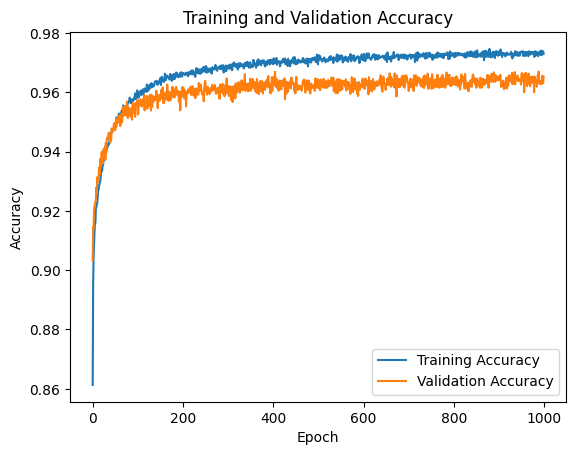

In [ ]:
t(history_final.history['loss'], label='Training Loss')
plt.plot(history_final.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

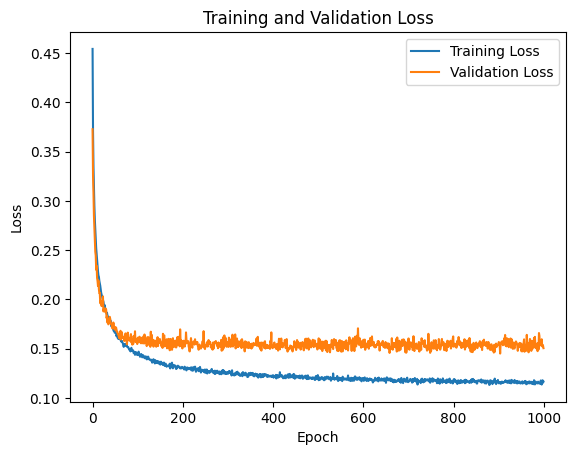

In [ ]:
y_pred = model_sb.predict(X_test)

349/349 [==============================] - 1s 3ms/step

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test = y_test.astype(int)
y_pred = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc)
print(prec)
print(rec)
print(f1)

0.9652883666696565

0.9459302325581396

0.9783523752254961

0.9618681643511676